In [1]:
!pip install geopy

In [2]:
!pip install shapely

In [5]:
!pip install geojson

In [7]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import json
from geopy.distance import geodesic
import folium
import os
import geojson

In [8]:
import geopandas as gpd

## Station M+ vélo


In [41]:
df = pd.read_csv('velo_0.csv',sep=None,engine='python')
df['latitude'] = [element[0] for element in df['geo_point_2d'].str.split(',')]
df['longitude'] = [element[1] for element in df['geo_point_2d'].str.split(',')]
#df['latitude'] = df['latitude'].astype(object)
#df['longitude'] = df['longitude'].astype(object)

In [92]:
df['rayon'] = [0.05 for element in df['longitude']]
df

,﻿code,geo_point_2d,libelle,adresse,type,total,commune,id,epci,latitude,longitude,rayon
0,AGENCE_METRO_VELO_CAMPUS,"45.193071,5.7697",Mvélo+ Campus,BIBLIOTHÈQUE (AVENUE DE LA),AGENCE METRO-VELO,0,Saint-Martin-d'Hères,AGENCE_METRO_VELO_CAMPUS,LaMetro,45.193071,5.7697,0.05
1,AGENCE_METRO_VELO_GRENOBLE_PRESQUILE,"45.20299,5.704202",Mvélo+ Grenoble Presqu'île,84 AVNENUE DES MARTYRS,AGENCE METRO-VELO,0,Grenoble,AGENCE_METRO_VELO_GRENOBLE_PRESQUILE,LaMetro,45.20299,5.704202,0.05
2,AGENCE_METRO_VELO_CROLLES,"45.27407,5.886524",Mvélo+ Crolles,431 AVENUE AMBROISE CROIZAT,AGENCE METRO-VELO,0,Crolles,AGENCE_METRO_VELO_CROLLES,LeGresivaudan,45.27407,5.886524,0.05
3,AGENCE_METRO_VELO_GARE_DE_GRENOBLE,"45.19209430074016,5.714565123053317",Mvélo+ Gare de Grenoble,ÉMILE GUEYMARD (RUE),AGENCE METRO-VELO,0,Grenoble,AGENCE_METRO_VELO_GARE_DE_GRENOBLE,LaMetro,45.19209430074016,5.714565123053317,0.05


In [102]:
map = folium.Map(location = [45.188529,5.724524],
                 zoom_start=14,
                 title = 'Station M')


In [97]:
for index,row in df.iterrows():
  folium.CircleMarker(location =[row['latitude'],row['longitude']],rayon=row['rayon'],
                      fill=True,
                      color='yellow',
                      fill_color='black',
                      tooltip=f"Localisation :{row['adresse']}").add_to(map)



In [104]:
map

## ZFE

Le dataframe ( c'est un dataframe ) puisse qu'on peut utiliser zfe.info() est composé d'une seule ligne qui regroupe toutes les coordonnées de la ZFE

In [17]:
zfe = gpd.read_file('aire_couverte_zfe_02:22.geojson')
#print(zfe.head())

zfe['geometry'].type

#coordinates = zfe['geometry'].apply(lambda x : (x.y,x.x))
#coordinates

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1 non-null      object        
 1   date_debut                 1 non-null      datetime64[ms]
 2   date_fin                   1 non-null      object        
 3   vp_critair                 1 non-null      object        
 4   vp_horaires                1 non-null      object        
 5   vul_critair                1 non-null      object        
 6   vul_horaires               1 non-null      object        
 7   pl_critair                 1 non-null      object        
 8   pl_horaires                1 non-null      object        
 9   autobus_autocars_critair   1 non-null      object        
 10  autobus_autocars_horaires  1 non-null      object        
 11  deux_rm_critair            1 non-null      object        
 12  deux

In [103]:
for _, row in zfe.iterrows():
  folium.GeoJson(
      data=row["geometry"],
      style_function=lambda x: {
          "fillColor": "none",
          "color": "red",
          "weight": 3,
          "opacity": 1
          }
  ).add_to(map)

## Comptages

In [ ]:
df = pd.read_csv('BaseDeDonnées/Comptage_mode_deplacement/comptages_velos_permanents.csv',sep=None,engine='python')
df = df[df['nom_comm']=='Grenoble']
df= df.dropna()


In [ ]:
def fct_comptage_velos_permanents(file):
    df = pd.read_csv(file,sep=None,engine='python')
    df=df[df['nom_comm']=='Grenoble']
    df=df.dropna()
    colonnes = df.columns[df.columns.str.startswith('tmj')]
    colonnes = colonnes.tolist()
    colonnes.append('id')
    colonnes.append('localisation')
    df= df[colonnes]
    #df = pd.concat([df_concat_1,df_concat_2],ignore_index=False)
    colonnes = df.columns[df.columns.str.startswith('tmj_')]
    df = df.groupby('localisation')[colonnes].mean().reset_index()
    df = df.melt(id_vars='localisation',value_name='valeur',var_name='tmj')
    return df

In [ ]:
fct_comptage_velos_permanents('BaseDeDonnées/Comptage_mode_deplacement/comptages_velos_permanents.csv')

,localisation,tmj_,valeur
0,Avenue des Jeux Olympiques,tmj_2019,1060.0
1,Boulevard Maréchal Lyautey,tmj_2019,1653.0
2,Cours LaFontaine,tmj_2019,1644.0
3,Rue Léo Lagrange,tmj_2019,2240.0
4,Avenue des Jeux Olympiques,tmj_2020,1017.0
5,Boulevard Maréchal Lyautey,tmj_2020,1939.0
6,Cours LaFontaine,tmj_2020,2212.0
7,Rue Léo Lagrange,tmj_2020,2217.0
8,Avenue des Jeux Olympiques,tmj_2021,1149.0
9,Boulevard Maréchal Lyautey,tmj_2021,2808.0


In [ ]:
df

,id,nom_post,nom_comm,code_insee,modes,date_instal,localisation,type_compteur,type_axe,tmj_2019,...,jour_de_pointe_2021,jour_de_pointe_2020,jour_de_pointe_2019,date_pointe_2022,date_pointe_2021,date_pointe_2020,territoire,date_pointe_2019,fid,geo_point_2d
14,29,(Grenoble) Quai de France,Grenoble,38185,Velos,20201130,Quai de France,Boucle_ZELT,piste cyclable sur trottoir,NaN,...,3348.0,1570.0,NaN,20221018,20210923.0,20201216.0,Grenoble Alpes Metropole,NaN,15,"45.19350548275992, 5.721711966985628"
15,24,(Grenoble) Stade des Alpes,Grenoble,38185,Velos,20200515,Stade des Alpes,Boucle_ZELT,chronovélo,NaN,...,4464.0,3938.0,NaN,20221018,20210928.0,20200916.0,Grenoble Alpes Metropole,NaN,16,"45.18875600001901, 5.7409040000000005"
16,27,(Grenoble) Gare,Grenoble,38185,Velos,20191211,Gare de Grenoble,Boucle_ZELT,chronovélo,NaN,...,2000.0,1277.0,NaN,20221018,20211203.0,20201008.0,Grenoble Alpes Metropole,NaN,17,"45.193810000019006, 5.714295999999998"
19,13,(Grenoble) Boulevard Maréchal Lyautey,Grenoble,38185,Velos,20190415,Boulevard Maréchal Lyautey,Boucle_ZELT,chronovélo,1653.0,...,5365.0,4581.0,3073.0,20221018,20210930.0,20200915.0,Grenoble Alpes Metropole,20191217.0,20,"45.18590415666572, 5.729315941991063"
20,16,(Grenoble) Av. des jeux olympiques - gre1,Grenoble,38185,Velos,20071016,Avenue des Jeux Olympiques,Boucle_ZELT,chronovélo,1060.0,...,2249.0,2481.0,2213.0,20221018,20210922.0,20200916.0,Grenoble Alpes Metropole,20191008.0,21,"45.174577000019035, 5.744287"
21,23,(Grenoble) Cours Lafontaine / Afficheur,Grenoble,38185,Velos,20191202,Cours LaFontaine,ZELT+Afficheur,chronovélo,1644.0,...,5923.0,5022.0,3883.0,20221018,20210923.0,20200917.0,Grenoble Alpes Metropole,20191217.0,22,"45.187801611428846, 5.724328842807184"
23,17,(Grenoble) Rue Léo Lagrange - Gre2,Grenoble,38185,Velos,20071016,Rue Léo Lagrange,Boucle_ZELT,chronovélo,2240.0,...,5306.0,5203.0,4053.0,20221018,20210921.0,20200916.0,Grenoble Alpes Metropole,20190604.0,24,"45.18015900001901, 5.719620000000001"


### Piétons

In [ ]:
df = pd.read_csv('BaseDeDonnées/Comptage_mode_deplacement/comptages_pietons_permanents.csv',sep=None,engine='python')


In [ ]:
df

,id,nom_post,nom_comm,code_insee,modes,date_instal,localisation,type_compteur,type_axe,tmj_2019,...,jour_de_pointe_2021,jour_de_pointe_2020,jour_de_pointe_2019,date_pointe_2022,date_pointe_2021,date_pointe_2020,territoire,date_pointe_2019,fid,geo_point_2d
0,7,(St Egrève) Pont barrage,Saint-Égrève,38382,Piétons / vélos,20180901,Pont Barrage,Pyrobox,voie verte,469,...,3189,10193,1468,20220619,20210618,20200617,Grenoble Alpes Metropole,20190417,1,"45.23533645505988, 5.655959985560492"
1,1,(Gières) Gare,Gières,38179,Piétons / vélos,20180901,Gare de Gière,Pyrobox,piste cyclable,652,...,1461,1711,1643,20221011,20211112,20200303,Grenoble Alpes Metropole,20190313,2,"45.18388872308442, 5.780030290217618"
2,6,(Meylan) Passerelle des Taillées,Gières,38179,Piétons / vélos,20180801,Passerelle des Taillées,Poteau_infrarouge,passerelle,1110,...,2225,3019,2021,20220426,20210527,20200621,Grenoble Alpes Metropole,20191214,3,"45.19603700001898, 5.754223"
3,10,(Gieres) Passerelle Ile d'Amour,Gières,38179,Piétons / vélos,20180901,Passerelle de l'Ile d'Amour,Pyrobox,passerelle,2267,...,4985,4779,5278,20221018,20210425,20200524,Grenoble Alpes Metropole,20190501,4,"45.198966330525096, 5.769218551580001"
4,5,(Grenoble) Rue de Bonne,Grenoble,38185,Piétons / vélos,20180901,Rue de Bonne,Poteau_infrarouge,rue piétonne,8885,...,19241,17804,22947,20221217,20211211,20200111,Grenoble Alpes Metropole,20191221,5,"45.19013401253099, 5.727430967132344"
5,8,(Grenoble) Rue Lafayette,Grenoble,38185,Piétons / vélos,20180901,Rue Lafayette,Poteau_infrarouge,rue piétonne,10355,...,16282,32522,19397,20221217,20210522,20200615,Grenoble Alpes Metropole,20191130,6,"45.19086102546297, 5.729223226333564"
6,9,(Grenoble) Rue de la Poste,Grenoble,38185,Piétons / vélos,20180901,Rue de la Poste,Poteau_infrarouge,rue piétonne,5325,...,10419,8760,12042,20220918,20211009,20200111,Grenoble Alpes Metropole,20191221,7,"45.18884200001901, 5.727771999999999"
7,21,(Grenoble) Passerelle Saint Laurent,Grenoble,38185,Piétons / vélos,20191219,Passerelle du Saint-Laurent,Pyrobox,passerelle,11988,...,11014,32504,25997,20221016,20211017,20200228,Grenoble Alpes Metropole,20191223,8,"45.19428578425923, 5.729205728687503"
8,3,(Eybens) Passerelle d'Eybens,Eybens,38158,Piétons / vélos,20180901,Passerelle d'Eybens,Pyrobox,passerelle,401,...,839,1093,1041,20221020,20210930,20200510,Grenoble Alpes Metropole,20190910,9,"45.15305223210389, 5.741733747976732"
9,4,(Echirolles) Passerelle d'Echirolles,Échirolles,38151,Piétons / vélos,20180901,Passerelle d'Echirolles,Pyrobox,passerelle,487,...,6007,1050,1088,20220517,20211210,20200915,Grenoble Alpes Metropole,20190705,10,"45.15170016886506, 5.721760408138022"


In [ ]:
def fct_comptage_pietons_permanents(file):
    df = pd.read_csv(file,sep=None,engine='python')
    df=df[df['nom_comm']=='Grenoble']
    colonnes = df.columns[df.columns.str.startswith('tmj')]
    colonnes = colonnes.tolist()
    colonnes.append('id')
    colonnes.append('localisation')
    df= df[colonnes]
    #df = pd.concat([df_concat_1,df_concat_2],ignore_index=False)
    colonnes = df.columns[df.columns.str.startswith('tmj')]
    df = df.groupby('localisation')[colonnes].mean().reset_index()
    df = df.melt(id_vars='localisation',value_name='valeur',var_name='tmj')
    return df



In [ ]:
fct_comptage_pietons_permanents('BaseDeDonnées/Comptage_mode_deplacement/comptages_pietons_permanents.csv')

,localisation,tmj,valeur
0,Grande Rue,tmj_2019,12965.0
1,Passerelle du Saint-Laurent,tmj_2019,11988.0
2,Rue Lafayette,tmj_2019,10355.0
3,Rue de Bonne,tmj_2019,8885.0
4,Rue de la Poste,tmj_2019,5325.0
5,Grande Rue,tmj_2020,6756.0
6,Passerelle du Saint-Laurent,tmj_2020,7392.0
7,Rue Lafayette,tmj_2020,9509.0
8,Rue de Bonne,tmj_2020,8201.0
9,Rue de la Poste,tmj_2020,3798.0


In [ ]:
df_tmja = df[['id','nom_comn','tmj_2019','tmj_2020','tmj_2021','tmj_2022']]
df['latitude'] = [element[0] for element in df['geo_point_2d'].str.split(',')]
df['longitude']= [element[1] for element in df['geo_point_2d'].str.split(',')]

df

,id,tmj_2019,tmj_2020,tmj_2021,tmj_2022,geo_point_2d,latitude,longitude
0,7,469,646,608,632,"45.23533645505988, 5.655959985560492",45.23533645505988,5.655959985560492
1,1,652,498,589,727,"45.18388872308442, 5.780030290217618",45.18388872308442,5.780030290217618
2,6,1110,1146,1371,1527,"45.19603700001898, 5.754223",45.19603700001898,5.754223
3,10,2267,1936,2189,2367,"45.198966330525096, 5.769218551580001",45.198966330525096,5.769218551580001
4,5,8885,8201,9448,9807,"45.19013401253099, 5.727430967132344",45.19013401253099,5.727430967132344
5,8,10355,9509,7873,6331,"45.19086102546297, 5.729223226333564",45.19086102546297,5.729223226333564
6,9,5325,3798,4392,4427,"45.18884200001901, 5.727771999999999",45.18884200001901,5.727771999999999
7,21,11988,7392,4460,5203,"45.19428578425923, 5.729205728687503",45.19428578425923,5.729205728687503
8,3,401,393,430,541,"45.15305223210389, 5.741733747976732",45.15305223210389,5.741733747976732
9,4,487,456,581,585,"45.15170016886506, 5.721760408138022",45.15170016886506,5.721760408138022


<ipython-input-234-b94c54c73c3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geo_point_2d'] = df['geo_point_2d'].apply(list)


,id,tmj_2019,tmj_2020,tmj_2021,tmj_2022,geo_point_2d
0,7,469,646,608,632,"[4, 5, ., 2, 3, 5, 3, 3, 6, 4, 5, 5, 0, 5, 9, ..."
1,1,652,498,589,727,"[4, 5, ., 1, 8, 3, 8, 8, 8, 7, 2, 3, 0, 8, 4, ..."
2,6,1110,1146,1371,1527,"[4, 5, ., 1, 9, 6, 0, 3, 7, 0, 0, 0, 0, 1, 8, ..."
3,10,2267,1936,2189,2367,"[4, 5, ., 1, 9, 8, 9, 6, 6, 3, 3, 0, 5, 2, 5, ..."
4,5,8885,8201,9448,9807,"[4, 5, ., 1, 9, 0, 1, 3, 4, 0, 1, 2, 5, 3, 0, ..."
5,8,10355,9509,7873,6331,"[4, 5, ., 1, 9, 0, 8, 6, 1, 0, 2, 5, 4, 6, 2, ..."
6,9,5325,3798,4392,4427,"[4, 5, ., 1, 8, 8, 8, 4, 2, 0, 0, 0, 0, 1, 9, ..."
7,21,11988,7392,4460,5203,"[4, 5, ., 1, 9, 4, 2, 8, 5, 7, 8, 4, 2, 5, 9, ..."
8,3,401,393,430,541,"[4, 5, ., 1, 5, 3, 0, 5, 2, 2, 3, 2, 1, 0, 3, ..."
9,4,487,456,581,585,"[4, 5, ., 1, 5, 1, 7, 0, 0, 1, 6, 8, 8, 6, 5, ..."


In [ ]:
df[['latitude', 'longitude']] = pd.DataFrame(df['geo_point_2d'].tolist(), index=df.index)
df


ValueError: Columns must be same length as key

In [ ]:
for element in df.geo_point_2d:
    print(element[0])

4
4
4
4
4
4
4
4
4
4
4


In [ ]:
df.columns

Index(['id', 'nom_post', 'nom_comm', 'code_insee', 'modes', 'date_instal',
       'localisation', 'type_compteur', 'type_axe', 'tmj_2019', 'tmj_2020',
       'tmj_2021', 'tmj_2022', 'tmjo_2019', 'tmjo_2020', 'tmjo_2021',
       'tmjo_2022', 'tmjwe_2019', 'tmjwe_2020', 'tmjwe_2021', 'tmjwe_2022',
       'jour_de_pointe_2022', 'jour_de_pointe_2021', 'jour_de_pointe_2020',
       'jour_de_pointe_2019', 'date_pointe_2022', 'date_pointe_2021',
       'date_pointe_2020', 'territoire', 'date_pointe_2019', 'fid',
       'geo_point_2d'],
      dtype='object')

In [ ]:
df = pd.read_csv('BaseDeDonnées/Comptage_mode_deplacement/comptages_pietons_ponctuels.csv',sep=None,engine='python')
df

,id,nom_comm,code_insee,nom_rue,nom_axe,date_deb,date_fin,p_7h_8h,p_8h_9h,p_9h_10h,...,freq_max,h_freq_max,freq_min,h_freq_min,orien_etiq,orien,num_poste,num_ope,fid,geo_point_2d
0,135,Vif,38545,Boulevard Faidherbe,Boulevard Faidherbe,20200702,20200702,0.0,15.0,12.0,...,15.0,08h00 - 09h00,12.0,09h00 - 10h00,NaN,NaN,P01A,OPE 215,1,"45.056071000019365, 5.667688"
1,136,Vif,38545,Boulevard Faidherbe,Boulevard Faidherbe,20200702,20200702,0.0,22.0,30.0,...,30.0,09h00 - 10h00,22.0,08h00 - 09h00,NaN,NaN,P01B,OPE 215,2,"45.05612500001938, 5.667701"
2,137,Vif,38545,Avenue de Rivalta Di Torino,Avenue de Rivalta Di Torino,20200702,20200702,0.0,6.0,8.0,...,8.0,09h00 - 10h00,6.0,08h00 - 09h00,NaN,NaN,P02A,OPE 215,3,"45.05479800001937, 5.672677999999999"
3,138,Vif,38545,Avenue de Rivalta Di Torino,Avenue de Rivalta Di Torino,20200702,20200702,0.0,8.0,13.0,...,13.0,09h00 - 10h00,8.0,08h00 - 09h00,NaN,NaN,P02B,OPE 215,4,"45.05485700001938, 5.672723000000001"
4,128,Echirolles,38151,Avenue Marie Reynoard,Avenue Marie Reynoard,20200125,20200131,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,193,5,"45.15757808604469, 5.7288195545059715"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,175,GIERES,38179,RUE DE L'ISÈRE,RUE DE L'ISÈRE,20210119,20210119,32.0,94.0,69.0,...,148.0,16h00 - 17h00,16.0,18h00 - 19h00,NaN,NaN,P07,OPE 258,110,"45.18382300001902, 5.790875"
110,176,GIERES,38179,RUE DES VIAIRES,RUE DES VIAIRES,20210119,20210119,0.0,5.0,2.0,...,18.0,15h00 - 16h00,0.0,07h00 - 08h00,NaN,NaN,P08,OPE 258,111,"45.18608400001902, 5.791545999999999"
111,177,GIERES,38179,ALLÉE DU CHARMANT SOM,ALLÉE DU CHARMANT SOM,20210119,20210119,4.0,19.0,35.0,...,124.0,11h00 - 12h00,3.0,18h00 - 19h00,NaN,NaN,P09,OPE 258,112,"45.185216000019004, 5.793734999999999"
112,178,GIERES,38179,RUE DE LA LIBÉRATION,RUE DE LA LIBÉRATION,20210119,20210119,9.0,17.0,3.0,...,24.0,17h00 - 18h00,3.0,09h00 - 10h00,NaN,NaN,P10,OPE 258,113,"45.183904000019005, 5.798383999999999"


In [ ]:
df.columns

Index(['id', 'nom_comm', 'code_insee', 'nom_rue', 'nom_axe', 'date_deb',
       'date_fin', 'p_7h_8h', 'p_8h_9h', 'p_9h_10h', 'p_10h_11h', 'p_11h_12h',
       'p_12h_13h', 'p_13h_14h', 'p_14h_15h', 'p_15h_16h', 'p_16h_17h',
       'p_17h_18h', 'p_18h_19h', 'p_tot_am', 'p_tot_pm', 'p_tot_jour',
       'moy_am', 'moy_pm', 'freq_max', 'h_freq_max', 'freq_min', 'h_freq_min',
       'orien_etiq', 'orien', 'num_poste', 'num_ope', 'fid', 'geo_point_2d'],
      dtype='object')

## Polution de l'air

In [ ]:
df = pd.read_csv('BaseDeDonnées/Pollution/Mesure_air/vigilance_aura.csv')

In [ ]:
def fct_pollution(file):
    df = pd.read_csv(file,sep=None,engine='python')

    ## Colonnes misent en minuscule
    df.columns = df.columns.str.lower()
    df['date_ech']= pd.to_datetime(df['date_ech'])
    df['annee']=df['date_ech'].dt.year

    ## Opérations sur les états
    df['etat'] = df['etat'].astype(str)
    df['etat'] = df['etat'].replace('ALERTE SUR PERSISTANCE','ALERTE')
    df['com_court'].astype(str)
    df=df[df['lib_zone']=='Bassin Grenoblois']

    #Création premier dataframe groupé
    df = df.groupby(['annee','etat'])['com_court'].count().reset_index()
    df = df.rename(columns = {'com_court':'Nombre_observations'})

    ## Création deuxième df
    df_2 = df.groupby('annee')['Nombre_observations'].sum().reset_index()
    df_2 = df_2.rename(columns = {'Nombre_observations':'Nombre total observations'})

    ## Fusion des deux dataframes
    df = pd.merge(df,df_2,on='annee',how='left')

    ##Création de la colonne ratio
    df['Ratio'] = round(df['Nombre_observations']/df['Nombre total observations']*100)
    return df


In [ ]:
repertory_pollution = 'BaseDeDonnées/Pollution/Mesure_air/'

In [ ]:
def fct_concat_pollution():
    df = pd.DataFrame()
    for file in os.listdir(repertory_pollution):
        if file !='.DS_Store':
            df_pollution = fct_pollution(repertory_pollution+str(file))
            df=pd.concat([df,df_pollution],ignore_index=True)
    return df

In [ ]:
fct_concat_pollution().dtypes

annee                          int32
etat                          object
Nombre_observations            int64
Nombre total observations      int64
Ratio                        float64
dtype: object

In [ ]:
fct_pollution('BaseDeDonnées/Pollution/Mesure_air/vigilance_aura.csv')

,annee,etat,Nombre_observations,Nombre total observations,Ratio
0,2019,ALERTE,13,359,4.0
1,2019,INFORMATION ET RECOMMANDATION,7,359,2.0
2,2019,PAS DE DEPASSEMENT,339,359,94.0
3,2020,ALERTE,4,37,11.0
4,2020,INFORMATION ET RECOMMANDATION,1,37,3.0
5,2020,PAS DE DEPASSEMENT,32,37,86.0


In [ ]:
df = df[df['lib_zone']=='Bassin Grenoblois']
df['date_ech']= pd.to_datetime(df['date_ech'])
df['annee']=df['date_ech'].dt.year
df['etat'] = df['etat'].astype(str)
df['com_court'].astype(str)
df['com_long'].astype(str)


13                                                  aucun
25                                                  aucun
42                                                  aucun
65                                                  aucun
92                                                  aucun
                              ...                        
8236                                                aucun
8256                                                aucun
8259                                                aucun
8281                                                aucun
8301    Lundi 31 décembre 2018, les taux de particules...
Name: com_long, Length: 396, dtype: object

In [ ]:
df.dtypes

code_zone                        int64
lib_zone                        object
date_debut_vigilance            object
date_ech                datetime64[ns]
date_dif                        object
lib_pol                         object
code_pol                        object
etat                            object
couleur                         object
com_court                       object
com_long                        object
annee                            int32
dtype: object

In [ ]:

L_alerte=[element for element in df[(df['etat']=='ALERTE') & (df['annee']==2019)]['com_court']]
L_alerte_pers=[element for element in df[(df['etat']=='ALERTE SUR PERSISTANCE') & (df['annee']==2019)]['com_court']]
L_info = [element for element in df[(df['etat']=='INFORMATION ET RECOMMANDATION') & (df['annee']==2019)]['com_court']]



In [ ]:
df_group_etat = df.groupby(['annee','etat'])['com_court'].count().reset_index()
df_group_etat = df_group_etat.rename(columns = {'com_court':'Nombre d\'observations'})
df_group_etat_2 = df_group_etat.groupby('annee')['Nombre d\'observations'].sum().reset_index()
df_group_etat_2 = df_group_etat_2.rename(columns = {'Nombre d\'observations':'Nombre total d\'observations'})
df_group_etat= pd.merge(df_group_etat,df_group_etat_2,on='annee',how='left')
df_group_etat['Ratio']

,annee,etat,Nombre d'observations_x,Nombre d'observations_y
0,2019,ALERTE,4,359
1,2019,ALERTE SUR PERSISTANCE,9,359
2,2019,INFORMATION ET RECOMMANDATION,7,359
3,2019,PAS DE DEPASSEMENT,339,359
4,2020,ALERTE,3,37
5,2020,ALERTE SUR PERSISTANCE,1,37
6,2020,INFORMATION ET RECOMMANDATION,1,37
7,2020,PAS DE DEPASSEMENT,32,37


In [ ]:
df

,code_zone,lib_zone,date_debut_vigilance,date_ech,date_dif,lib_pol,code_pol,etat,couleur,com_court,com_long,annee
13,2000,Bassin Grenoblois,2020-02-05,2020-02-06,2020-02-05,aucun,aucun,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2020
25,2000,Bassin Grenoblois,2020-02-04,2020-02-05,2020-02-04,aucun,aucun,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2020
42,2000,Bassin Grenoblois,2020-02-03,2020-02-04,2020-02-03,aucun,aucun,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2020
65,2000,Bassin Grenoblois,2020-02-02,2020-02-03,2020-02-02,aucun,aucun,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2020
92,2000,Bassin Grenoblois,2020-02-01,2020-02-02,2020-02-01,aucun,aucun,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
8236,2000,Bassin Grenoblois,2019-01-05,2019-01-06,2019-01-05,aucun,aucun,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2019
8256,2000,Bassin Grenoblois,2019-01-04,2019-01-05,2019-01-04,aucun,aucun,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2019
8259,2000,Bassin Grenoblois,2019-01-03,2019-01-04,2019-01-03,aucun,aucun,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2019
8281,2000,Bassin Grenoblois,2019-01-02,2019-01-03,2019-01-02,aucun,aucun,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2019


### Premier dataset

In [ ]:
Lien : https://www.data.gouv.fr/fr/datasets/episodes-de-pollution-prevus-ou-constates-2/

In [ ]:
df_air = pd.read_csv('BaseDeDonnées/Pollution/Episode_pollution.csv',sep=None)

<ipython-input-85-52b8435a4444>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_air = pd.read_csv('BaseDeDonnées/Pollution/Episode_pollution.csv',sep=None)


In [ ]:
df_air

,﻿id,gid,code_zone,lib_zone,date_ech,date_dif,code_pol,lib_pol,etat,couleur,com_court,com_long,OBJECTID,SHAPE__Area,SHAPE__Length
0,1,1,2016,Zone Alpine Ain,2024/01/14 00:00:00+00,2024/01/13 00:00:00+00,8,Dioxyde d'azote,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,1,3.359408e+09,346225.361125
1,2,2,2016,Zone Alpine Ain,2024/01/13 00:00:00+00,2024/01/13 00:00:00+00,8,Dioxyde d'azote,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,2,3.359408e+09,346225.361125
2,3,3,2016,Zone Alpine Ain,2024/01/14 00:00:00+00,2024/01/13 00:00:00+00,7,Ozone,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,3,3.359408e+09,346225.361125
3,4,4,2016,Zone Alpine Ain,2024/01/13 00:00:00+00,2024/01/13 00:00:00+00,7,Ozone,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,4,3.359408e+09,346225.361125
4,5,5,2016,Zone Alpine Ain,2024/01/14 00:00:00+00,2024/01/13 00:00:00+00,5,Particules PM10,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,5,3.359408e+09,346225.361125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,626,2020,Allier,2024/01/17 00:00:00+00,2024/01/17 00:00:00+00,8,Dioxyde d'azote,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,626,1.551189e+10,726675.483950
626,627,627,2020,Allier,2024/01/18 00:00:00+00,2024/01/17 00:00:00+00,7,Ozone,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,627,1.551189e+10,726675.483950
627,628,628,2020,Allier,2024/01/17 00:00:00+00,2024/01/17 00:00:00+00,7,Ozone,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,628,1.551189e+10,726675.483950
628,629,629,2020,Allier,2024/01/18 00:00:00+00,2024/01/17 00:00:00+00,5,Particules PM10,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,629,1.551189e+10,726675.483950


In [ ]:
df_air.columns = df_air.columns.str.lower()

In [ ]:
df_air.lib_zone.unique()

array(['Zone Alpine Ain', 'Zone Alpine Isère', 'Ouest Ardèche',
       'Contreforts Massif Central', 'Vallée Maurienne Tarentaise',
       'Zone des Coteaux', 'Zone urbaine des Pays de Savoie',
       'Bassin Lémanique', 'Bassin Stéphanois', 'Ouest Ain',
       'Zone Alpine Savoie', "Vallée de l'Arve", 'Bassin Lyon Nord-Isère',
       'Bassin Grenoblois', 'Est Drôme', 'Vallée du Rhône',
       'Zone Alpine Haute-Savoie', 'Puy-de-Dôme', 'Haute-Loire', 'Cantal',
       'Allier'], dtype=object)

In [ ]:
df_air = df_air[df_air['lib_zone']=='Bassin Grenoblois']
df_air

,﻿id,gid,code_zone,lib_zone,date_ech,date_dif,code_pol,lib_pol,etat,couleur,com_court,com_long,objectid,shape__area,shape__length
78,79,79,2000,Bassin Grenoblois,2024/01/14 00:00:00+00,2024/01/13 00:00:00+00,8,Dioxyde d'azote,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,79,1.728482e+09,400232.762904
79,80,80,2000,Bassin Grenoblois,2024/01/13 00:00:00+00,2024/01/13 00:00:00+00,8,Dioxyde d'azote,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,80,1.728482e+09,400232.762904
80,81,81,2000,Bassin Grenoblois,2024/01/14 00:00:00+00,2024/01/13 00:00:00+00,7,Ozone,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,81,1.728482e+09,400232.762904
81,82,82,2000,Bassin Grenoblois,2024/01/13 00:00:00+00,2024/01/13 00:00:00+00,7,Ozone,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,82,1.728482e+09,400232.762904
82,83,83,2000,Bassin Grenoblois,2024/01/14 00:00:00+00,2024/01/13 00:00:00+00,5,Particules PM10,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,83,1.728482e+09,400232.762904
83,84,84,2000,Bassin Grenoblois,2024/01/13 00:00:00+00,2024/01/13 00:00:00+00,5,Particules PM10,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,84,1.728482e+09,400232.762904
204,205,205,2000,Bassin Grenoblois,2024/01/15 00:00:00+00,2024/01/14 00:00:00+00,8,Dioxyde d'azote,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,205,1.728482e+09,400232.762904
205,206,206,2000,Bassin Grenoblois,2024/01/14 00:00:00+00,2024/01/14 00:00:00+00,8,Dioxyde d'azote,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,206,1.728482e+09,400232.762904
206,207,207,2000,Bassin Grenoblois,2024/01/15 00:00:00+00,2024/01/14 00:00:00+00,7,Ozone,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,207,1.728482e+09,400232.762904
207,208,208,2000,Bassin Grenoblois,2024/01/14 00:00:00+00,2024/01/14 00:00:00+00,7,Ozone,PAS DE DEPASSEMENT,#19FF19,aucun,aucun,208,1.728482e+09,400232.762904


In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 78 to 587
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ﻿id            30 non-null     int64  
 1   gid            30 non-null     int64  
 2   code_zone      30 non-null     int64  
 3   lib_zone       30 non-null     object 
 4   date_ech       30 non-null     object 
 5   date_dif       30 non-null     object 
 6   code_pol       30 non-null     int64  
 7   lib_pol        30 non-null     object 
 8   etat           30 non-null     object 
 9   couleur        30 non-null     object 
 10  com_court      30 non-null     object 
 11  com_long       30 non-null     object 
 12  objectid       30 non-null     int64  
 13  shape__area    30 non-null     float64
 14  shape__length  30 non-null     float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.8+ KB


### Deuxième dataset

In [ ]:
df_air = pd.read_csv('BaseDeDonnées/Pollution/Pouvoir_rechauffement_global.csv',sep=None,engine='python')
df_air.columns=df_air.columns.str.lower()

In [ ]:
df_air

,insee commune,commune,agriculture,autres transports,autres transports international,co2 biomasse hors-total,déchets,energie,industrie hors-énergie,résidentiel,routier,tertiaire
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756
...,...,...,...,...,...,...,...,...,...,...,...,...
35793,95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,176.098160,309.627908,235.439109
35794,95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,1395.529811,18759.370071,403.404815
35795,95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,22613.830247,12217.122402,13849.512001
35796,95682,VILLIERS-LE-SEC,1090.890170,NaN,NaN,326.748418,108.969749,2.354558,6.911213,67.235487,4663.232127,85.657725


In [ ]:
df_air.dtypes

insee commune                       object
commune                             object
agriculture                        float64
autres transports                  float64
autres transports international    float64
co2 biomasse hors-total            float64
déchets                            float64
energie                            float64
industrie hors-énergie             float64
résidentiel                        float64
routier                            float64
tertiaire                          float64
dtype: object

In [ ]:
codes_communes = ['38185','38111','38151','38421']
df_air = df_air[df_air['insee commune'].isin(codes_communes)]

In [ ]:
df_air.commune.unique()

array(['CLAIX', 'ECHIROLLES', 'GRENOBLE', "SAINT-MARTIN-D'HERES"],
      dtype=object)

In [ ]:
df_air

,insee commune,commune,agriculture,autres transports,autres transports international,co2 biomasse hors-total,déchets,energie,industrie hors-énergie,résidentiel,routier,tertiaire
14525,38111,CLAIX,1249.198630,NaN,NaN,6839.884143,64.666670,826.449767,2425.835886,9043.056873,15051.747216,4304.799676
14559,38151,ECHIROLLES,327.023335,159.642549,NaN,30415.217109,294.783526,4134.603393,12136.090644,26758.121586,41429.735572,22776.747078
14589,38185,GRENOBLE,325.698857,1384.627352,50266.963481,191801.539199,1323.527144,19387.428441,56906.930730,199054.598984,136268.129114,126966.922047
14812,38421,SAINT-MARTIN-D'HERES,24.659236,192.852090,NaN,24674.248324,314.072830,1876.582520,5508.237040,34849.632060,36821.897564,22868.518944


## Traffic laboratory

In [ ]:
import re

In [ ]:
def fct_transform_tmja_to_axes_routier(file):

    df_tmja = pd.read_csv(file, sep=None,engine='python')
    ##Conversion en date pour extraire l'année
    df_tmja.columns = df_tmja.columns.str.lower()
    df_tmja.columns = df_tmja.columns.str.replace(r'_','',regex=True)
    df_tmja['datereferentiel'] = pd.to_datetime(df_tmja['datereferentiel'])
    df_tmja['annee'] = df_tmja['datereferentiel'].dt.year

    ##Filtre sur les routes du département de l'Isère
    df_tmja = df_tmja[df_tmja['depprd'] == 38]
    df_tmja = df_tmja.dropna()  # Il y en a très peu

    df_tmja['longueur'] = df_tmja['longueur'].str.replace(',', '.')
    df_tmja['ratiopl'] = df_tmja['ratiopl'].str.replace(',', '.')
    df_tmja['ratiopl'] = df_tmja['ratiopl'].astype(float)

    df_tmja['ratiopl'] = df_tmja['ratiopl']/100
    df_tmja['nb_poids_lourds'] = round(df_tmja['tmja'] * df_tmja['ratiopl'])
    ## Création de la base de donnée avec les routes
    df_axes_routier = df_tmja.groupby(['route', 'annee'])[['tmja', 'nb_poids_lourds']].mean().reset_index().sort_values(by='tmja', ascending=False)

    df_axes_routier['ratiopl'] = round((df_axes_routier['nb_poids_lourds']/df_axes_routier['tmja'])*100)
    df_axes_routier['tmja']=round(df_axes_routier['tmja'])
    df_axes_routier = df_axes_routier[(df_axes_routier['route'] != 'N0007') & (df_axes_routier['route'] != 'A0007N')]
    df_axes_routier = df_axes_routier.rename(columns={'tmja': 'Taux Moyen Journalier Annualisé (en Millions)'})

    df_axes_routier = df_axes_routier.rename(columns={'route': 'Axe routier'})

    df_axes_routier['Axe routier'] = df_axes_routier['Axe routier'].replace('A0041', 'A41')
    df_axes_routier['Axe routier'] = df_axes_routier['Axe routier'].replace('A0043', 'A43')
    df_axes_routier['Axe routier'] = df_axes_routier['Axe routier'].replace('A0007', 'A7')
    df_axes_routier['Axe routier'] = df_axes_routier['Axe routier'].replace('A0048', 'A48')
    df_axes_routier['Axe routier'] = df_axes_routier['Axe routier'].replace('A0049', 'A49')
    df_axes_routier['Axe routier'] = df_axes_routier['Axe routier'].replace('N0085', 'Nationale 85')
    df_axes_routier['Axe routier'] = df_axes_routier['Axe routier'].replace('N0087', 'Nationale 87')
    df_axes_routier['Axe routier'] = df_axes_routier['Axe routier'].replace('A0051N', 'A51')

    return df_axes_routier

In [ ]:
file = "BaseDeDonnées/Traffic_routier/tmja-2019.csv"


In [ ]:
df = pd.read_csv(file,sep=None,engine='python')
df.columns = df.columns.str.replace(r'_','',regex=True)
df

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,absF,cumulF,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTraficlib,TMJA,ratioPL
0,01/01/2019,31D0044,44,0,31,N,0,0,"511656,78","6204078,36",...,44,44,"511698,51","6204063,93",0,NaN,NaN,NaN,NaN,NaN
1,01/01/2019,31D0044E,762,0,31,N,0,0,"511367,22","6204210,06",...,762,762,"511880,76","6203732,4",0,NaN,NaN,NaN,NaN,NaN
2,01/01/2019,69D0301,6055,2,69,N,-981,0,"844036,84","6510806,45",...,71,6055,"849346,89","6509342,34",0,NaN,NaN,NaN,NaN,NaN
3,01/01/2019,69D0383,13752,4,69,N,-494,0,"846831,3","6522372,16",...,544,13752,"843537,87","6512429,8",0,NaN,NaN,NaN,NaN,NaN
4,01/01/2019,69D0383BPNL,2408,0,69,N,0,0,"844982,46","6522772,27",...,413,2408,"846831,3","6522372,16",0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060,8,76,N,0,0,"560104,39","6927892,82",...,960,2060,"559383,28","6929517,35",0,0.0,NaN,NaN,NaN,NaN
4691,01/01/2019,P0224,8995,211,31,N,-638,0,"555988,61","6288880,3",...,344,8995,"562812,02","6287175,9",0,NaN,NaN,NaN,NaN,NaN
4692,01/01/2019,P0524,1777,31,33,N,-768,0,"440252,1","6361052,92",...,1009,1777,"440343,36","6359374,43",0,NaN,NaN,NaN,NaN,NaN
4693,01/01/2019,P0524,3860,31,33,N,1009,1777,"458798,85","6325912,32",...,568,5637,"458785,94","6322872,51",0,NaN,NaN,NaN,NaN,NaN


In [ ]:
fct_transform_tmja_to_axes_routier(file)

,Axe routier,annee,Taux Moyen Journalier Annualisé (en Millions),nb_poids_lourds,ratiopl
10,Nationale 87,2019,81459.0,41994.888889,52.0
0,A7,2019,72946.0,14121.750000,19.0
3,A43,2019,62042.0,6661.454545,11.0
4,A48,2019,52104.0,3287.333333,6.0
2,A41,2019,46345.0,1834.090909,4.0
9,Nationale 85,2019,30206.0,22352.000000,74.0
5,A49,2019,23777.0,1640.400000,7.0
7,A0432,2019,23561.0,6274.000000,27.0
6,A51,2019,16018.0,578.800000,4.0


In [ ]:
def fct_test(file):
    try:
        df = pd.read_csv(file,sep=None,engine='python')
        df.columns = df.columns.str.lower()
        return df
    except pd.errors.ParserError as e:
        print(f"Erreur de type {e}")
        return None


In [ ]:
fct_test(file)

,datereferentiel,route,longueur,prd,depprd,concessionprd,absd,cumuld,xd,yd,...,concessionprf,absf,cumulf,xf,yf,zf,anneemesuretrafic,typecomptagetrafic,tmja,ratiopl
0,2017-01-01,A0001,2440,0,93,N,0,0,"653006,6","6867037,55",...,N,460,2440,"652896,51","6869469,21",0,2017,Permanent horaire,180631,NaN
1,2017-01-01,A0001,"785,2",2,93,N,460,2440,"652896,51","6869469,21",...,N,"248,2","3225,2","653176,46","6870095,57",0,2017,Permanent horaire,180631,NaN
2,2017-01-01,A0001,"401,8",3,93,N,"248,2","3225,2","653176,46","6870095,57",...,N,650,3627,"653552,97","6870234,42",0,2017,Permanent horaire,180631,NaN
3,2017-01-01,A0001,"820,5",3,93,N,650,3627,"653552,97","6870234,42",...,N,"460,5","4447,5","654322,46","6870520,65",0,2017,Permanent horaire,180631,NaN
4,2017-01-01,A0001,"229,5",4,93,N,"460,5","4447,5","654322,46","6870520,65",...,N,690,4677,"654547,05","6870570,75",0,2017,Permanent horaire,180631,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,2017-01-01,N1135,4497,1,55,N,380,1380,"860513,86","6853736,35",...,N,877,5877,"863297,05","6850839,83",0,2017,Permanent horaire,6231,"11,1"
4350,2017-01-01,N1154,3457,0,28,N,0,0,"586956,13","6822750,3",...,N,485,3457,"586544,15","6819695,74",0,2017,Permanent horaire,17938,"14,6"
4351,2017-01-01,N1154,4290,3,28,N,485,3457,"586544,15","6819695,74",...,N,775,7747,"583955,84","6816352,43",0,2017,Permanent horaire,20275,NaN
4352,2017-01-01,N1569,4293,8,13,N,600,8371,"858796,33","6275193,08",...,N,898,12664,"860968,7","6278624,2",0,2017,Temporaire journalier,11104,NaN


In [ ]:
df = pd.read_csv(file,sep='\t')
df

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,concessionPrF,absF,cumulF,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,TMJA,ratioPL
0,2018-01-01,A0001,2440,0,93,N,0,0,"653006,6","6867037,55",...,N,460,2440,"652896,51","6869469,21",0,2018,1.0,180631,NaN
1,2018-01-01,A0001,"785,2",2,93,N,460,2440,"652896,51","6869469,21",...,N,"248,2","3225,2","653176,46","6870095,57",0,2018,1.0,180631,NaN
2,2018-01-01,A0001,"401,8",3,93,N,"248,2","3225,2","653176,46","6870095,57",...,N,650,3627,"653552,97","6870234,42",0,2018,1.0,180631,NaN
3,2018-01-01,A0001,"820,5",3,93,N,650,3627,"653552,97","6870234,42",...,N,"460,5","4447,5","654322,46","6870520,65",0,2018,1.0,180631,NaN
4,2018-01-01,A0001,"229,5",4,93,N,"460,5","4447,5","654322,46","6870520,65",...,N,690,4677,"654547,05","6870570,75",0,2018,1.0,180631,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,2018-01-01,N1135,236,0,55,N,290,290,"859802,47","6854546,43",...,N,526,526,"859974,01","6854385,94",0,2018,1.0,6214,"10,4"
4420,2018-01-01,N1135,854,0,55,N,526,526,"859974,01","6854385,94",...,N,380,1380,"860513,86","6853736,35",0,2018,1.0,6214,"10,4"
4421,2018-01-01,N1135,4497,1,55,N,380,1380,"860513,86","6853736,35",...,N,877,5877,"863297,05","6850839,83",0,2018,1.0,6214,"10,4"
4422,2018-01-01,N1154,3457,0,28,N,0,0,"586956,13","6822750,3",...,N,485,3457,"586544,15","6819695,74",0,2018,1.0,17489,"14,3"


In [ ]:
fct_transform_tmja_to_axes_routier(file)

,Axe routier,annee,longueur,Taux Moyen Journalier Annualisé (en Millions),nb_poids_lourds,ratiopl
2,A43,2018,1255230433062456205420061656952422321881303870...,843811,90986.0,11.0
8,Nationale 87,2018,5001988745174619915457.8588.23505,757587,39909.0,5.0
3,A48,2018,7501563096359045413038082017,294116,20735.0,7.0
0,A7,2018,10245738526506830,287880,55419.0,19.0
7,Nationale 85,2018,1988175124490538311,219135,15561.0,7.0
4,A49,2018,95121342710488110731865,118516,8079.0,7.0
1,A41,2018,10175944539502849,109533,7565.0,7.0
5,A51,2018,106002900732,17562,1083.0,6.0


In [ ]:
repertory_traffic = 'BaseDeDonnées/Traffic_routier/'
L=[]
for file_2 in os.listdir('BaseDeDonnées/Traffic_routier'):
    if file_2!='.DS_Store':
        L.append(file_2)
        #df = fct_transform_tmja_to_axes_routier(file_2)
print(L)
def fct_concat():
    L=[]
    for file_2 in os.listdir('BaseDeDonnées/Traffic_routier'):
        if file_2!='.DS_Store':
            L.append(file_2)
    df = fct_transform_tmja_to_axes_routier(repertory_traffic+str(L[0]))
    for i in range(1,len(L)):
    #df_0 = fct_transform_tmja_to_axes_routier(repertory_traffic+str(L[0]))
    #df=fct_transform_tmja_to_axes_routier(repertory_traffic+str(L[i]))
        df = pd.concat([df,fct_transform_tmja_to_axes_routier(repertory_traffic+str(L[i]))])

    return df

['tmja2018.csv', 'TMJA_2016.csv', 'tmja-2017.csv']


In [ ]:
fct_concat()

,Axe routier,annee,longueur,Taux Moyen Journalier Annualisé (en Millions),nb_poids_lourds,ratiopl
2,A43,2018,1255230433062456205420061656952422321881303870...,843811,90986.0,11.0
8,Nationale 87,2018,5001988745174619915457.8588.23505,757587,39909.0,5.0
3,A48,2018,7501563096359045413038082017,294116,20735.0,7.0
0,A7,2018,10245738526506830,287880,55419.0,19.0
7,Nationale 85,2018,1988175124490538311,219135,15561.0,7.0
4,A49,2018,95121342710488110731865,118516,8079.0,7.0
1,A41,2018,10175944539502849,109533,7565.0,7.0
5,A51,2018,106002900732,17562,1083.0,6.0
10,Nationale 87,2016,658.51477.5996992745174619913374660,795008,40966.0,5.0
3,A43,2016,6151255456062456205420061656952475316581303870...,755348,77562.0,10.0


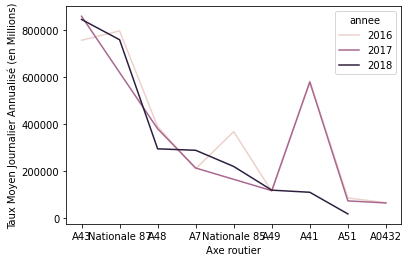

In [ ]:

sns.lineplot(data = fct_concat(),
           x='Axe routier',
           y='Taux Moyen Journalier Annualisé (en Millions)',hue ='annee')

plt.show()

## Accident laboratory

In [ ]:
df = pd.read_csv('BaseDeDonnées/Accidents_france/Véhicules/vehicules-2018.csv',sep=',')
df['Num_Acc'] = df['Num_Acc'].astype(str)

In [ ]:
import re

In [ ]:
#### Test

In [ ]:
df = pd.read_csv('BaseDeDonnées/Accidents_france/Caractéristiques/caracteristiques-2018.csv',encoding='ISO-8859-1')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(r'_','',regex=True)

df


,numacc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590
1,201800000002,18,2,12,1015,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590
2,201800000003,18,3,4,1135,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590
3,201800000004,18,5,5,1735,1,2,1,7.0,3.0,52,30 rue Jules Guesde,M,5051974.0,289123.0,590
4,201800000005,18,6,26,1605,1,2,1,1.0,3.0,477,72 rue Victor Hugo,M,5051607.0,290605.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57778,201800057779,18,12,15,1050,1,2,1,1.0,6.0,611,passamanty-Sada ( rue de,Y,1280217.0,4521356.0,976
57779,201800057780,18,12,16,610,2,2,1,1.0,3.0,611,mamoudzou centre-Command,Y,1278120.0,4523436.0,976
57780,201800057781,18,12,22,2150,5,2,1,1.0,6.0,611,kaweni-SPPM ( rue de la,Y,1276930.0,4522409.0,976
57781,201800057782,18,12,23,1945,5,2,1,1.0,1.0,611,cavani-Kavani sud ( rue,Y,1278622.0,4522036.0,976


In [ ]:
df = pd.read_csv('BaseDeDonnées/Accidents_france/Véhicules/vehicules-2018.csv',sep=None,engine='python')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(r'_','',regex=True)
df.catv.unique()

array([ 7, 33,  1,  2, 30, 32, 13, 10, 15, 21, 34, 31,  3, 17, 35, 99, 38,
       14, 36, 37, 39, 20, 16, 40])

In [ ]:
def fct_file_carac(file):
    df_accident = pd.read_csv(file,sep=None,engine='python',encoding='ISO-8859-1')
    if 'Accident_Id' in df_accident.columns:
        df_accident = df_accident.rename(columns={'Accident_Id': 'Num_Acc'})
    df_accident['Num_Acc'] = df_accident['Num_Acc'].astype(str)

    annee = df_accident.iloc[0]['Num_Acc'][:4]

    return int(annee)

In [ ]:
def fct_file_vehicule(file):
    df_vehicule = pd.read_csv(file,sep=None,engine='python')
    if 'Accident_Id' in df_vehicule.columns:
        df_vehicule = df_vehicule.rename(columns ={'Accident_Id':'Num_Acc'})
    df_vehicule['Num_Acc'] = df_vehicule['Num_Acc'].astype(str)
    annee = df_vehicule.iloc[0]['Num_Acc'][:4]
    return int(annee)

In [ ]:
fct_file_carac('BaseDeDonnées/Accidents_france/Caractéristiques/caract-2023.csv')

NameError: name 'fct_file_carac' is not defined

In [ ]:
fct_file_vehicule('BaseDeDonnées/Accidents_france/Véhicules/vehicules-2022.csv')

2022

In [ ]:
def fct_compatibilite(file_caract,file_vehicule):

    return fct_file_carac(file_caract)==fct_file_vehicule(file_vehicule)

In [ ]:
fct_compatibilite('BaseDeDonnées/Accidents_france/Caractéristiques/caract-2023.csv','BaseDeDonnées/Accidents_france/Véhicules/vehicules-2022.csv')

False

In [ ]:

repertory_caract = 'BaseDeDonnées/Accidents_france/Caractéristiques/'
repertory_vehicule = 'BaseDeDonnées/Accidents_france/Véhicules/'




/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/construction.py:553: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


ValueError: Shape of passed values is (6, 1), indices imply (6, 2)

In [ ]:
repertory_caract = 'BaseDeDonnées/Accidents_france/Caractéristiques/'
repertory_vehicule = 'BaseDeDonnées/Accidents_france/Véhicules/'

In [ ]:
files_vehi = [file for file in os.listdir(repertory_vehicule) if file!='.DS_Store']
files_caract = [file for file in os.listdir(repertory_caract) if file!='.DS_Store']

In [ ]:
def fct_concat_acc():
    files_v = files_vehi
    files_c = files_caract
    df = pd.DataFrame()
    for file_carac in files_c:
        for file_vehi in files_v:
            if fct_compatibilite(repertory_caract+str(file_carac),repertory_vehicule+str(file_vehi))==True:
                df_accident = fct_accidents(repertory_caract+str(file_carac),repertory_vehicule+str(file_vehi))
                df = pd.concat([df,df_accident],ignore_index=False)
    return df




In [ ]:
fct_concat_acc()

,Année,Nombre d'accidents
0,2023,68
0,2021,87
0,2022,68
0,2019,72
0,2020,75


In [ ]:
df.dtypes

Nombre d'accidents    int64
Test_2                int64
dtype: object

In [ ]:
fct_merge('BaseDeDonnées/Accidents_france/Caractéristiques','BaseDeDonnées/Accidents_france/Véhicules')

'.DS_Store'

In [ ]:
fct_merge('BaseDeDonnées/Accidents_france/Caractéristiques','BaseDeDonnées/Accidents_france/Véhicules')

.DS_Store .DS_Store
caract-2023.csv vehicules-2021.csv
carcteristiques-2021.csv vehicules-2022.csv
carcteristiques-2022.csv vehicules-2023.csv


In [ ]:
L=[]
for files_caract,files_vehi in zip(os.listdir('BaseDeDonnées/Accidents_france/Caractéristiques'),os.listdir('BaseDeDonnées/Accidents_france/Véhicules')):
    if files_caract != '.DS_Store':
        print(files_caract,files_vehi)



caract-2023.csv vehicules-2021.csv
carcteristiques-2021.csv vehicules-2022.csv
carcteristiques-2022.csv vehicules-2023.csv


# Indicateur : Nombre d'accidents à vélo

## Base de données accidents

In [ ]:
#Nom dossier : 'BaseDeDonnées/Accidents_france/caract-2023.csv'
# Nom dossier : 'BaseDeDonnées/Accidents_france/caract-2022.csv' à rajouter suivant le notebook utilisé google colab ou jupyter
df_accidents_2023 = pd.read_csv("caract-2023.csv",sep=';') #2023
df_accidents_2022 = pd.read_csv("carcteristiques-2022.csv",sep=';')#2022

In [ ]:

df_accidents_2022 = df_accidents_2022.rename(columns={'Accident_Id':'Num_Acc'})

In [ ]:
#df_vehicules = pd.read_csv('BaseDeDonnées/Accidents_france/vehicles.csv')
# Nom dossier : 'BaseDeDonnées/Accidents_france/vehicules-2023.csv'
#Nom dossier : 'BaseDeDonnées/Accidents_france/vehicules-2022.csv'
df_vehicules_2023 = pd.read_csv('vehicules-2023.csv',sep=';')
df_vehicules_2022 = pd.read_csv('vehicules-2022.csv',sep=';')

In [ ]:
df_accidents_2022


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000"
1,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000"
2,202200000003,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,"48,4931620000","-2,7604390000"
3,202200000004,20,10,2022,18:00,1,16,16102,2,3,8,6,LOHMEYER (RUE),"45,6926520000","-0,3262900000"
4,202200000005,19,10,2022,11:45,1,13,13103,1,1,1,2,ROUTE DE JEAN MOULIN-RN 538,"43,6755790366","5,0927031775"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55297,202200055298,1,1,2022,03:50,3,2B,2B293,1,1,1,6,D71,"42,3101650000","9,4785830000"
55298,202200055299,1,1,2022,07:20,3,84,84074,1,1,1,6,D973,"43,7531640000","5,2244760000"
55299,202200055300,1,1,2022,04:27,3,74,74001,1,1,9,6,D22,"46,2825320000","6,7328060000"
55300,202200055301,1,1,2022,08:40,1,81,81099,1,3,1,3,Chemin Toulze,"43,9272650000","1,9156370000"


In [ ]:
df_vehicules_2022

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
25,202200000016,813 927,B01,2,1,0,2,1,1,5,NaN
27,202200000017,813 925,B01,2,1,0,2,0,1,5,NaN
38,202200000025,813 913,A01,1,1,9,0,0,1,5,NaN
41,202200000027,813 910,Z01,1,1,0,1,1,1,5,NaN
67,202200000046,813 883,B01,3,1,0,2,0,1,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
94357,202200055213,715 769,B01,3,1,0,2,3,16,5,NaN
94415,202200055252,715 708,A01,3,1,0,0,0,0,5,NaN
94429,202200055263,715 692,C01,2,1,0,2,8,15,5,NaN
94430,202200055263,715 694,B01,2,1,0,0,4,11,5,NaN


## Filtre par département et zone urbaine

In [ ]:
df_accidents_grenoble_2023 = df_accidents_2023[df_accidents_2023['dep']=='38'] # 2023
df_accidents_grenoble_2022 = df_accidents_2022[(df_accidents_2022['dep']== '38')] #2022

## Filtre sur les véhicules qui sont des vélos

In [ ]:
df_vehicules_2023 = df_vehicules_2023[df_vehicules_2023['catv']==1]
df_vehicules_2022 = df_vehicules_2022[df_vehicules_2022['catv']==1]

## Merge avec Vehicules

In [ ]:
df_accidents_grenoble_2023 = pd.merge(df_accidents_grenoble_2023,df_vehicules_2023, how='inner',on='Num_Acc')
df_accidents_grenoble_2022 = pd.merge(df_accidents_grenoble_2022,df_vehicules_2022, how='inner',on='Num_Acc')


In [ ]:
df_accidents_grenoble_2023 = df_accidents_grenoble_2023[df_accidents_grenoble_2023['catv']==1]
df_accidents_grenoble_2022 = df_accidents_grenoble_2022[df_accidents_grenoble_2022['catv']==1]


In [ ]:
df_accidents_grenoble_2022

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202200000480,25,3,2022,16:30,1,38,38035,2,1,...,813 114,B01,0,1,0,2,8,13,5,NaN
1,202200000746,24,3,2022,16:45,1,38,38185,2,1,...,812 631,B01,3,1,0,2,1,19,5,NaN
2,202200000886,7,9,2022,17:15,1,38,38053,2,1,...,812 378,B01,3,1,0,2,8,19,5,NaN
3,202200001722,2,11,2022,12:00,1,38,38053,2,6,...,810 897,B01,2,1,0,2,0,0,5,NaN
4,202200001808,7,11,2022,18:52,5,38,38151,2,1,...,810 738,B01,2,1,0,0,0,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,202200050876,28,3,2022,08:30,2,38,38185,2,1,...,723 394,A01,2,1,0,9,1,13,5,NaN
64,202200050876,28,3,2022,08:30,2,38,38185,2,1,...,723 400,B01,2,1,0,9,1,21,5,NaN
65,202200051380,8,5,2022,18:15,1,38,38095,2,1,...,722 510,A01,3,1,0,2,1,1,5,NaN
66,202200052133,10,7,2022,19:00,1,38,38206,1,1,...,721 225,B01,3,1,0,2,1,1,5,NaN


In [ ]:
print('Le nombre d\'accidents en 2023 était de : {} et de {} en 2022'.format(len(df_accidents_grenoble_2023),len(df_accidents_grenoble_2022)))

Le nombre d'accidents en 2023 était de : 68 et de 68 en 2022


In [ ]:
df_vehicules_2022.dtypes

,0
Num_Acc,int64
id_vehicule,object
num_veh,object
senc,int64
catv,int64
obs,int64
obsm,int64
choc,int64
manv,int64
motor,int64


In [ ]:
df_vehicules_2022['Num_Acc'] = df_vehicules_2022['Num_Acc'].astype(str)
premier_element = int(df_vehicules_2022.iloc[0]['Num_Acc'][:4])
premier_element

2022

In [ ]:
def fct_accidents(file_caracteristique,file_vehicules):
        df_accidents = pd.read_csv(file_caracteristique,sep=';')
        df_vehicules = pd.read_csv(file_vehicules, sep=';')
        ##Condition pour avoir les clefs primaires du même nom
        if 'Accident_Id' in df_accidents.columns:
            df_accidents = df_accidents.rename(columns={'Accident_Id':'Num_Acc'})
        ## Condition pour avoir des fichiers de même année
        df_vehicules['Num_Acc']= df_vehicules['Num_Acc'].astype(str)
        if df_accidents['an'][0]+int(df_vehicules.iloc[0]['Num_Acc'][:4]) != df_accidents['an'][0]*2:
            print('Les fichiers comparés sont de la mauvaise année, l\'un l\'année {} et l\'autre l\'année {}'.format(int(df_vehicules['Num_Acc'][0].str[:4]),df_accidents['ann'][0]))

        df_vehicules['Num_Acc'] = df_vehicules['Num_Acc'].astype(int)
        df_accidents = df_accidents[df_accidents['dep']=='38']
        df_vehicules = df_vehicules[df_vehicules['catv']==1]
        df_accidents_grenoble = pd.merge(df_accidents,df_vehicules, how='inner',on='Num_Acc')
        df_accidents_grenoble =df_accidents_grenoble[df_accidents_grenoble['catv']==1]

        annee = df_accidents.iloc[0]['an']
        return len(df_accidents_grenoble),annee

In [ ]:
fct_accidents('caract-2023.csv','vehicules-2023.csv')[1]

2023

L'étude de ces fichiers n'est pas terminée mais déjà on peut avoir une idée du nombre d'accidents impliquant des vélos et voir si l'on peut en tirer quelque chose.
Entre 2005 - 2016  , il y a eu 448 accidents de vélo recensés par la police à Grenoble.

## Map des accidents qu'il y eu impliquant un cycliste dans l'agglomération Grenobloise.

In [ ]:
df_accidents_grenoble_2023['lat']= df_accidents_grenoble_2023['lat'].str.replace(',','.')
df_accidents_grenoble_2023['long']= df_accidents_grenoble_2023['long'].str.replace(',','.')

In [ ]:
map_accidents_carrefour_Grenoble = folium.Map(location=[45.188529, 5.724524],
                                              zoom_start=14,
                                              titles = 'Map Accidents Carrefour Grenoble')


In [ ]:
df_accidents_grenoble_2023['lat']=df_accidents_grenoble_2023['lat'].astype(object)
df_accidents_grenoble_2023['long']=df_accidents_grenoble_2023['long'].astype(object)

for index, row in df_accidents_grenoble_2023.iterrows():
    folium.Marker([row['lat'], row['long']],icon=folium.Icon(color="black")).add_to(map_accidents_carrefour_Grenoble)

## Comparaison avec Strasbourg : l'autre ville branchée Vélo

In [ ]:
df_strasbourg_2023 = df_accidents_2023[df_accidents_2023['dep']=='67']
df_strasbourg_2022 = df_accidents_2022[df_accidents_2022['dep']=='67']

In [ ]:
df_strasbourg_2023 = pd.merge(df_strasbourg_2023,df_vehicules_2023, how='inner',on='Num_Acc')
df_strasbourg_2022 = pd.merge(df_strasbourg_2022,df_vehicules_2022, how='inner',on='Num_Acc')

In [ ]:
print(len(df_strasbourg_2023),len(df_strasbourg_2022))

100 121


## Affinage de l'analyse

# Grenoble

In [ ]:
df_carrefour = pd.read_csv('amenagement_carrefour.csv',sep=',')
df_carrefour

,locali_id,geo_point_2d,carref_id,carref_datesupp,carref_datecre,carref_datemaj,accessi_desc,id
0,7,"45.1592442108994,5.73097602290016",250,NaN,2.000010e+13,NaN,Accessible,124
1,7,"45.1784747317108,5.72400680810226",255,NaN,2.000010e+13,NaN,Accessible,125
2,7,"45.1787899004849,5.72390867736167",254,NaN,2.000010e+13,NaN,Accessible,126
3,7,"45.1919814588737,5.72857005674412",302,NaN,2.000010e+13,NaN,Accessible,127
4,7,"45.187256332043,5.71100083692238",261,NaN,2.000010e+13,NaN,Accessible,128
...,...,...,...,...,...,...,...,...
1301,7,"45.1842581189286,5.74677811022395",1068,NaN,2.000010e+13,NaN,Pas de passage piéton,1283
1302,7,"45.1845794749506,5.7134104469574",1075,NaN,2.000010e+13,NaN,Pas de passage piéton,1284
1303,7,"45.1738004173595,5.74005400273794",1170,NaN,2.000010e+13,NaN,Pas de passage piéton,1285
1304,7,"45.1669120305242,5.73823523806341",1182,NaN,2.000010e+13,NaN,Pas de passage piéton,1286


In [ ]:
df_carrefour['latitude'] = [element[0] for element in df_carrefour['geo_point_2d'].apply(lambda x : x.split(','))]
df_carrefour['longitude'] = [element[1] for element in df_carrefour['geo_point_2d'].apply(lambda x : x.split(','))]



In [ ]:
df_carrefour['accessi_desc'].unique()

array(['Accessible', 'Inaccessible', 'Part. accessible',
       'Pas de passage piéton'], dtype=object)

In [ ]:
df_carrefour.groupby('accessi_desc')['carref_id'].count().reset_index()

,accessi_desc,carref_id
0,Accessible,774
1,Inaccessible,194
2,Part. accessible,116
3,Pas de passage piéton,222


On prend un point qui va nous servir de centre

In [ ]:
for index, row in df_carrefour[df_carrefour['accessi_desc']=='Accessible'].iterrows():
    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color="green")).add_to(map_accidents_carrefour_Grenoble)

for index, row in df_carrefour[df_carrefour['accessi_desc']=='Pas de passage piéton'].iterrows():
    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color="white")).add_to(map_accidents_carrefour_Grenoble)

for index, row in df_carrefour[df_carrefour['accessi_desc']=='Part. accessible'].iterrows():
    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color="orange")).add_to(map_accidents_carrefour_Grenoble)

for index, row in df_carrefour[df_carrefour['accessi_desc']=='Inaccessible'].iterrows():
    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color="red")).add_to(map_accidents_carrefour_Grenoble)

In [ ]:
map_accidents_carrefour_Grenoble.save('carte_carrefour_accidents.html')

<iframe src="ma_carte.html" width="800" height="600"></iframe>

Ce qu'on remarque c'est que sur 10 accidents dans le centre ville élargit de Grenoble , il y en a 4 ou 5 qui se sont passés très proche d'un carrefour.
Ce qu'il s'est passé, nous manquons d'informations sur les conditions de cet accident mais le risque que ce soit du à l'agencement ou à la disposition des véhicules à proximité du carrefour doit très certainement jouer.
L'accessibilité du carrefour ne semble pas être un facteur déterminant de cause de l'accident.
Les données gps relatives aux carrefours exterieurs à Grenoble manque et ne couvrent pas les accidents en dehors de la zone du centre et hypercentre.

## Deuxième indicateur : comptage permanent vélo

In [ ]:
import pandas as pd
"Chemin à reprendre si on utilise JupyterNotebook BaseDeDonnées/comptages_velos_permanents.csv"
df=pd.read_csv("BaseDeDonnées/comptages_velos_permanents.csv")
df_vf=df[df['territoire'] == 'Grenoble Alpes Metropole']

#print(df.info())
#print(df.head(3))
df_vf.head()

FileNotFoundError: [Errno 2] No such file or directory: 'BaseDeDonnées/comptages_velos_permanents.csv'

In [ ]:
# Afficher ou vérifier les premières lignes du nouveau DataFrame
colonnes=['nom_post', 'modes','localisation','type_compteur','type_axe','tmj_2019','tmj_2020','tmj_2021','tmj_2022']
colonnes_bis=['nom_post','localisation','type_axe','tmj_2019','tmj_2020','tmj_2021','tmj_2022']

print(df_vf[colonnes_bis].head(10))

#### Comme tous les compteurs n'ont pas été installés au même moment, il existe beaucoup de valeurs manquantes (NaN), il sera alors nécessaire de les ignorer au moment des analyses car il ne conviendrait pas de les remplacer par des zéros (fausseraient les résultats) de supprimer les lignes associées (trop nombreuses)
#### Ce qu'il faudrait c'est donc au moment de faire les analyses, passer outre ces valeurs vides (si l'on cherche a avoir des moyennes par années ou par ville par exemple)

## Troisième indicateur : Kilomètre piste cyclable

In [ ]:
from shapely.geometry import Point
from shapely.geometry import LineString
import geopandas as gpd
from shapely.wkt import load

In [ ]:
df_piste = pd.read_csv('pistes_cyclables.xls')
df_piste

,ogc_fid,geo_point_2d,anne_maj,lametro,type,name,geo_shape
0,1489,"45.17402,5.74223",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.74223,4..."
1,1490,"45.17272,5.73701",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73701,4..."
2,1491,"45.17273,5.73488",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73488,4..."
3,1492,"45.17315,5.73476",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73476,4..."
4,1625,"45.20183,5.75957",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.75957,4..."
...,...,...,...,...,...,...,...
1197,2813,"45.15938,5.72401",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72401,4..."
1198,2810,"45.20988,5.83977",2021.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.83977,4..."
1199,1637,"45.19119,5.72127",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72127,4..."
1200,1639,"45.18615,5.72467",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72467,4..."


In [ ]:
L_lat=[]
L_long=[]
test = df_piste[['lat','long']]
for lat,lon in zip(test['lat'],test['long']):
  L_lat.append(float(lat))
  L_long.append(float(lon))

data = pd.DataFrame({
    'lat' : L_lat,
    'lon' : L_long,
})



In [ ]:
data

,lat,lon
0,45.17402,5.74223
1,45.17272,5.73701
2,45.17273,5.73488
3,45.17315,5.73476
4,45.20183,5.75957
...,...,...
1197,45.15938,5.72401
1198,45.20988,5.83977
1199,45.19119,5.72127
1200,45.18615,5.72467


In [ ]:
df_piste['lat'] = [element[0] for element in df_piste['geo_point_2d'].str.split(',')]
df_piste['long'] = [element[1] for element in df_piste['geo_point_2d'].str.split(',')]

In [ ]:
df_piste['lat'] = df_piste['lat'].astype(object)
df_piste['long'] = df_piste['long'].astype(object)



In [ ]:
df_piste['segment'] = df_piste['ogc_fid']

On prend notre point d'encrage de la map

In [ ]:
map_piste_cyclable = folium.Map(location=[45.188529, 5.724524],
                                              zoom_start=14,
                                              titles = 'Map Piste Cyclable')

Transformation de geo_shape en json

In [ ]:
df_piste['geo_shape'] = df_piste['geo_shape'].apply(lambda x: LineString(eval(x)['coordinates']))

In [ ]:
df_piste['coordonnees']= df_piste['geo_shape'].apply(lambda x : list(x.coords)).to_list()


In [ ]:
def reverse_coordonnees(liste):
  return [(coordonnees[1],coordonnees[0]) for coordonnees in liste ]

In [ ]:
df_piste['coordonnees']= df_piste['coordonnees'].apply(lambda x: reverse_coordonnees(x))

In [ ]:
for cords in df_piste['coordonnees']:
    folium.PolyLine(cords,color = 'red').add_to(map_piste_cyclable)

In [ ]:
df_piste['lat'] = df_piste['lat'].astype(float)
df_piste['long'] = df_piste['long'].astype(object)

In [ ]:
def fct_map_reseau_cyclable(file):
        df_piste = pd.read_csv(file)
        ## Création des colonnes 'latitude' et 'longitude'
        df_piste['lat'] = [element[1] for element in df_piste['geo_point_2d'].str.split(',')]
        df_piste['long'] = [element[0] for element in df_piste['geo_point_2d'].str.split(',')]
        df_piste['lat'] = df_piste['lat'].astype(object)
        df_piste['long'] = df_piste['long'].astype(object)
        df_piste['geo_shape'] = df_piste['geo_shape'].apply(lambda x: LineString(eval(x)['coordinates']))
        df_piste['coordonnees']= df_piste['geo_shape'].apply(lambda x : list(x.coords)).to_list()

        df_piste['coordonnees']= df_piste['coordonnees'].apply(lambda x: reverse_coordonnees(x))

        #df_piste=df_piste[['lat','long']]
        ## Création de la map
        #map_piste_cyclable = folium.Map(location=[45.188529, 5.724524],
                                              #zoom_start=14,
                                              #titles = 'Map Piste Cyclable')
        #for cords in df_piste['coordonnees']:
            #folium.PolyLine(cords,color = 'red').add_to(map_piste_cyclable)

        return df_piste

In [ ]:
fct_map_reseau_cyclable('pistes_cyclables.xls')

TypeError: 'list' object is not callable

In [ ]:
L=[]
#fct_map_reseau_cyclable('pistes_cyclables.xls')
for liste in fct_map_reseau_cyclable('pistes_cyclables.xls'):
  for element in liste:
    print(element[0],element[1])

TypeError: 'list' object is not callable

In [ ]:
map_piste_cyclable #affichage de la carte

In [ ]:
map_piste_cyclable.save('map_pistes_cyclables.html')

Explications

### Vérification des type LineString

## traffic routier

In [ ]:
!pip install pyproj

In [ ]:
import pyproj
from pyproj import Transformer

In [ ]:
from lxml import etree

root = etree.parse('qtvDir.xml')
for elem in root.iter():
    print( elem.text)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
                    

                        

                            
83.333336

            
None
2025-01-18T14:42:00.000+01:00

                

                    

                        

                            
2100

                

                    

                        

                            
82.0

            
None
2025-01-18T14:42:00.000+01:00

                

                    

                        

                            
930

                

                    

                        

                            
73.0

            
None
2025-01-18T14:42:00.000+01:00

                

                    

                        

                            
1840

                

                    

                        

                            
80.0

            
None
2025-01-18T14:42:00.000+01:00

                

               

In [ ]:
## Code communes Grenoble
L_communes = [38185,38421,38563,38239] #Grenoble , Saint martin d'heres , Voiron , Moirans

In [ ]:
df_traffic = pd.read_csv('tmj_axes_routier.csv',sep=';')

In [ ]:
df_traffic['dateReferentiel'] = pd.to_datetime(df_traffic['dateReferentiel'])
df_traffic['Annee'] = df_traffic['dateReferentiel'].dt.year

In [ ]:
annee = df_traffic['Annee'][0]
annee

2019

In [ ]:
#print(df_traffic.dtypes)
df_traffic = df_traffic[df_traffic['depPrD']==38]

In [ ]:
df_traffic = df_traffic.dropna() # Il y en a très peu

In [ ]:
df_traffic.columns

Index(['dateReferentiel', 'route', 'longueur', 'prD', 'depPrD',
       'concessionPrD', 'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF',
       'concessionPrF', 'absF', 'cumulF', 'xF', 'yF', 'zF',
       'anneeMesureTrafic', 'typeComptageTrafic', 'typeComptageTrafic_lib',
       'TMJA', 'ratio_PL'],
      dtype='object')

In [ ]:
df_traffic= df_traffic.rename(columns ={'prD':'Point de repère routier départ'})
df_traffic = df_traffic.rename(columns ={'prF':'Point de repère routier fin' })
df_traffic = df_traffic.rename(columns ={'depPrD':'Département PR départ' })
df_traffic = df_traffic.rename(columns ={'depPrF':'Département PR fin ' })

In [ ]:
df_traffic['xD']=df_traffic['xD'].str.replace(',','.')
df_traffic['xF']=df_traffic['xF'].str.replace(',','.')
df_traffic['yD']=df_traffic['yD'].str.replace(',','.')
df_traffic['yF']=df_traffic['yF'].str.replace(',','.')



df_traffic['xD']=df_traffic['xD'].astype(float)
df_traffic['yD']=df_traffic['yD'].astype(float)
df_traffic['xF']=df_traffic['xF'].astype(float)
df_traffic['yF']=df_traffic['yF'].astype(float)

### Partie pas concluante

In [ ]:
def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[1], lonlat[0]

In [ ]:


def xy_to_latlon_2(x, y, source_epsg, dest_epsg=4326):
    """Convertit des coordonnées X,Y dans un système de projection donné en latitude et longitude (WGS84).

    Args:
        x (float): Coordonnée X.
        y (float): Coordonnée Y.
        source_epsg (int): Code EPSG du système de projection source.
        dest_epsg (int, optional): Code EPSG du système de projection destination (WGS84 par défaut).

    Returns:
        tuple: Tuple contenant la latitude et la longitude.
    """

    transformer = Transformer.from_crs(source_epsg, dest_epsg)
    lon, lat = transformer.transform(x, y)
    return lat, lon

In [ ]:
#df_traffic['coordonnees_gps_debut'] = [xy_to_lonlat(element_x,element_y) for element_x,element_y in zip(df_traffic['xD'],df_traffic['yD'])]
df_traffic['coordonnees_gps_debut_2'] = [xy_to_latlon_2(element_x,element_y,32632) for element_x,element_y in zip(df_traffic['xD'],df_traffic['yD'])]

In [ ]:
df_traffic.route.values

array(['A0007', 'A0007', 'A0007', 'A0007', 'A0007N', 'A0007N', 'A0007N',
       'A0007N', 'A0041', 'A0041', 'A0041', 'A0041', 'A0041', 'A0041',
       'A0041', 'A0041', 'A0041', 'A0041', 'A0041', 'A0043', 'A0043',
       'A0043', 'A0043', 'A0043', 'A0043', 'A0043', 'A0043', 'A0043',
       'A0043', 'A0043', 'A0048', 'A0048', 'A0048', 'A0048', 'A0048',
       'A0048', 'A0049', 'A0049', 'A0049', 'A0049', 'A0049', 'A0051N',
       'A0051N', 'A0051N', 'A0051N', 'A0051N', 'A0432', 'A0432', 'A0432',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N00

In [ ]:
df_traffic['coordonnees_gps_fin'] = [xy_to_lonlat(element_x,element_y) for element_x,element_y in zip(df_traffic['xF'],df_traffic['yF'])]


In [ ]:
df_traffic['coordonnees'] = [(element_d,element_f) for element_d,element_f in zip(df_traffic['coordonnees_gps_debut'],df_traffic['coordonnees_gps_fin'])]


In [ ]:
df_traffic['coordonnees'] = df_traffic['coordonnees'].apply(lambda x : reverse_coordonnees(x))

In [ ]:
map_route = folium.Map(location=[45.188529, 5.724524],
                                              zoom_start=14,
                                              titles = 'Map Piste Cyclable')

In [ ]:
for cords in df_traffic['coordonnees']:
    folium.PolyLine(cords,color = 'blue').add_to(map_route)

In [ ]:
#map_route

La partie de visualisation des axes routiers est compliquée car on a des coordonnées X,Y qui sont fausses , du moins qui ne correspondent pas à des coordonnées GPS une fois conversion faite à des coordonnées en France et encore moins à Grenoble .

### Fin de partie peu concluante

### Approche par le regroupement

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_traffic.columns

Index(['dateReferentiel', 'route', 'longueur', 'prD', 'depPrD',
       'concessionPrD', 'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF',
       'concessionPrF', 'absF', 'cumulF', 'xF', 'yF', 'zF',
       'anneeMesureTrafic', 'typeComptageTrafic', 'typeComptageTrafic_lib',
       'TMJA', 'ratio_PL'],
      dtype='object')

In [ ]:
df_traffic['longueur']=df_traffic['longueur'].str.replace(',','.')
df_traffic['ratio_PL']=df_traffic['ratio_PL'].str.replace(',','.')
df_traffic['ratio_PL']=df_traffic['ratio_PL'].astype(float)
df_traffic['ratio_PL']=df_traffic['ratio_PL']/100

In [ ]:
df_traffic['Nb_poids_lourds'] = round(df_traffic['TMJA']* df_traffic['ratio_PL'])

In [ ]:
df_axes = df_traffic.groupby(['route','Annee'])[['longueur','TMJA','Nb_poids_lourds']].sum().reset_index().sort_values(by='TMJA',ascending=False)

df_axes['ratio_PL']=round((df_axes['Nb_poids_lourds']/df_axes['TMJA'])*100)


,route,Annee,longueur,TMJA,Nb_poids_lourds,ratio_PL
8,N0007,2019,503021124415163472867194399791299342.3706.7648...,1175847.0,904151.0,77.0
10,N0087,2019,5001988745174619915457.8588.23505,733132.0,377954.0,52.0
3,A0043,2019,125545606245620542006165311711348387065012755,682461.0,73276.0,11.0
2,A0041,2019,5001450780301028203540148010175944539502849,509799.0,20175.0,4.0
1,A0007N,2019,90646369184704,378864.0,60368.0,16.0
4,A0048,2019,2601590454130380820174935,312627.0,19724.0,6.0
0,A0007,2019,102457385265028826,291786.0,56487.0,19.0
9,N0085,2019,1988175124490538311,211442.0,156464.0,74.0
5,A0049,2019,95121342710488110731865,118883.0,8202.0,7.0
6,A0051N,2019,62229431435142326843,80092.0,2894.0,4.0


In [ ]:
def fct_transform_tmja_to_axes_routier(file):
    df_tmja = pd.read_csv(file,sep=';')
    df_tmja['dateReferentiel'] = pd.to_datetime(df_tmja['dateReferentiel'])
    df_tmja['Annee'] = df_tmja['dateReferentiel'].dt.year
    df_tmja = df_tmja[df_tmja['depPrD']==38]
    df_tmja = df_tmja.dropna() # Il y en a très peu

    df_tmja['longueur']=df_tmja['longueur'].str.replace(',','.')
    df_tmja['ratio_PL']=df_tmja['ratio_PL'].str.replace(',','.')
    df_tmja['ratio_PL']=df_tmja['ratio_PL'].astype(float)
    df_tmja['ratio_PL']=df_tmja['ratio_PL']/100
    df_tmja['Nb_poids_lourds'] = round(df_tmja['TMJA']* df_tmja['ratio_PL'])
    df_axes_routier = df_tmja.groupby(['route','Annee'])[['longueur','TMJA','Nb_poids_lourds']].sum().reset_index().sort_values(by='TMJA',ascending=False)

    df_axes_routier['ratio_PL']=round((df_axes_routier['Nb_poids_lourds']/df_axes_routier['TMJA'])*100)
    #df_axes_routier = pd.read_csv('Axes_routiers.csv')
    #df_axes_routier = df_axes_routier.drop(columns=['Unnamed: 0'])
    df_axes_routier = df_axes_routier[(df_axes_routier['route']!='N0007')&(df_axes_routier['route']!='A0007N')]
    df_axes_routier = df_axes_routier.rename(columns={'TMJA':'Taux Moyen Journalier Annualisé (en Millions)'})
    df_axes_routier = df_axes_routier.rename(columns={'route':'Axe routier'})

    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0041','A41')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0043','A43')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0007','A7')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0048','A48')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0049','A49')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('N0085','Nationale 85')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('N0087','Nationale 87')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0051N','A51')


    return df_axes_routier

In [ ]:
df_test = fct_transform_tmja_to_axes_routier('tmj_axes_routier.csv')
df_test

,Axe routier,Annee,longueur,Taux Moyen Journalier Annualisé (en Millions),Nb_poids_lourds,ratio_PL
10,Nationale 87,2019,5001988745174619915457.8588.23505,733132.0,377954.0,52.0
3,A43,2019,125545606245620542006165311711348387065012755,682461.0,73276.0,11.0
2,A41,2019,5001450780301028203540148010175944539502849,509799.0,20175.0,4.0
4,A48,2019,2601590454130380820174935,312627.0,19724.0,6.0
0,A7,2019,102457385265028826,291786.0,56487.0,19.0
9,Nationale 85,2019,1988175124490538311,211442.0,156464.0,74.0
5,A49,2019,95121342710488110731865,118883.0,8202.0,7.0
6,A51,2019,62229431435142326843,80092.0,2894.0,4.0
7,A0432,2019,1310246123,70683.0,18822.0,27.0


La route avec le plus de traffic par jour sur un an est la route nationale 7 qui est du côté de Valence qui ne rentre donc pas dans notre étude , suivi de la Route Nationale 87 avec 733 132 véhicules en moyen par jour sur l'agglomération Grenobloise, route plus connue sous le nom de 'Rocade Sud'

A43 : ne rentre pas dans l'étude

A41 : Qui vient de Chambéry
Tallonnée par A480 qui traverse Grenoble du nord au sud en venant de Lyon

Si on reprend notre carte des pistes de vélo :

On voit que les pistes cyclables sont tout autour de cette Rocade Sud mais c'est problèmatique , on ne peut pas la longer , aller tout droit comme le ferait la piste cyclable qui longe l'A48

Cela peut se conçevoir du fait des travaux autour qui durent depuis plus années.

On l'a vu , un des critères à l'utilisation des pistes cyclables c'est quelles soient directes , avec le moins de détours possibles.

Ici , quelqu'un qui veut se rendre depuis Meylan à Échirolles risque de prendre inévitablement la voiture.

Murianettes - Gières - Poisat - Eybens = > sinon faire une piste cyclable plus adaptée sur cette portion , comme on l'a vu , pour avoir une piste cyclable beaucoup plus adaptée.

#### Passage en csv pour streamLit

In [ ]:
df_axes = df_axes.to_csv()

In [ ]:
type(df_axes)

str

In [ ]:
#df_axes_test = pd.read_csv('Axes_routiers.csv')
df_axes_test = pd.read_csv(df_axes)
df_axes_test

OSError: [Errno 36] File name too long: ',route,Annee,longueur,TMJA,Nb_poids_lourds,ratio_PL\n8,N0007,2019,503021124415163472867194399791299342.3706.7648.5425.5119317085018455456231133127317795578792558495512177110225512049285021701303225543737224286828622167343.1614.62.3,1175847.0,904151.0,77.0\n10,N0087,2019,5001988745174619915457.8588.23505,733132.0,377954.0,52.0\n3,A0043,2019,125545606245620542006165311711348387065012755,682461.0,73276.0,11.0\n2,A0041,2019,5001450780301028203540148010175944539502849,509799.0,20175.0,4.0\n1,A0007N,2019,90646369184704,378864.0,60368.0,16.0\n4,A0048,2019,2601590454130380820174935,312627.0,19724.0,6.0\n0,A0007,2019,102457385265028826,291786.0,56487.0,19.0\n9,N0085,2019,1988175124490538311,211442.0,156464.0,74.0\n5,A0049,2019,95121342710488110731865,118883.0,8202.0,7.0\n6,A0051N,2019,62229431435142326843,80092.0,2894.0,4.0\n7,A0432,2019,1310246123,70683.0,18822.0,27.0\n'

## Indicateur : Nombre de park à vélo (plus map)

In [ ]:
df_sta = pd.read_csv('stationnement_velo.csv')

df_sta.columns

Index(['fid', 'id', 'id_local', 'id_osm', 'code_com', 'xlong', 'ylat',
       'capacite', 'capacite_cargo', 'mobilier', 'protection', 'couverture',
       'acces', 'surveillance', 'lumiere', 'url_info', 'd_service', 'source',
       'proprietaire', 'gestionnaire', 'date_maj', 'commentaires', 'nom_local',
       'commune_local', 'adresse_local', 'gratuit', 'type_accroche', 'type',
       'CODE', 'epci', 'lon', 'lat'],
      dtype='object')

In [ ]:
df_sta = df_sta[df_sta['commune_local']=='Grenoble']

In [ ]:
df_sta.isna().sum()

,0
fid,0
id,0
id_local,0
code_com,2
xlong,1
ylat,1
capacite,0
capacite_cargo,0
mobilier,0
protection,0


In [ ]:
df_sta= df_sta.drop(columns=['id_osm','gratuit','type_accroche'])
df_sta = df_sta.dropna()

In [ ]:
df_sta

,fid,id,id_local,code_com,xlong,ylat,capacite,capacite_cargo,mobilier,protection,...,date_maj,commentaires,nom_local,commune_local,adresse_local,type,CODE,epci,lon,lat
0,1,1,1,38185.0,5.714076,45.181421,40,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Irvoy,Grenoble,18 Rue Irvoy,stationnementcyclable,0,LaMetro,5.71408,45.18142
1,2,3,3,38185.0,5.704258,45.202770,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Presqu'île,Grenoble,84 rue des Martyrs,stationnementcyclable,1,LaMetro,5.70426,45.20277
2,3,4,4,38185.0,5.712925,45.192064,42,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park gare Europole,Grenoble,2 Avenue Doyen Louis Weil,stationnementcyclable,2,LaMetro,5.71293,45.19206
3,4,5,5,38185.0,5.733307,45.194851,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Notre Dame Musée,Grenoble,50 Avenue Maréchal Randon,stationnementcyclable,3,LaMetro,5.73331,45.19485
4,5,6,6,38185.0,5.726688,45.186177,101,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Victor Hugo,Grenoble,Rue François Raoult,stationnementcyclable,4,LaMetro,5.72669,45.18618
5,6,7,7,38185.0,5.741103,45.188454,123,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Mistral Mairie,Grenoble,419 Avenue de Valmy,stationnementcyclable,5,LaMetro,5.74110,45.18845
6,7,8,8,38185.0,5.738740,45.162000,50,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Géants,Grenoble,10 Place des Géants,stationnementcyclable,6,LaMetro,5.73874,45.16200
7,8,9,9,38185.0,5.710744,45.188843,20,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Le Cèdre,Grenoble,Rue Anthoard,stationnementcyclable,7,LaMetro,5.71074,45.18884
8,9,10,10,38185.0,5.716797,45.189197,29,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Estacade,Grenoble,22 Rue Colonel Denfert Rochereau,stationnementcyclable,8,LaMetro,5.71680,45.18920
13,14,24,24,38185.0,5.734100,45.189395,5,0,RATELIER AVEC ARCEAU,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,minibox,VILLARS-HEBERT,Grenoble,3b rue Dominique Villars,stationnementcyclable,13,LaMetro,5.73410,45.18939


In [ ]:
df_sta.annee.values

array([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022],
      dtype=int32)

In [ ]:
import datetime

In [ ]:
df_sta['date_maj'] = pd.to_datetime(df_sta['date_maj'])

In [ ]:
df_sta['annee'] = df_sta['date_maj'].dt.year

In [ ]:
map_parking = folium.Map(location=[45.188529, 5.724524],
                                              zoom_start=14,
                                              titles = 'Map Parking Grenoble')

In [ ]:
df_sta

,fid,id,id_local,code_com,xlong,ylat,capacite,capacite_cargo,mobilier,protection,...,commentaires,nom_local,commune_local,adresse_local,type,CODE,epci,lon,lat,annee
0,1,1,1,38185.0,5.714076,45.181421,40,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Irvoy,Grenoble,18 Rue Irvoy,stationnementcyclable,0,LaMetro,5.71408,45.18142,2021
1,2,3,3,38185.0,5.704258,45.202770,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Presqu'île,Grenoble,84 rue des Martyrs,stationnementcyclable,1,LaMetro,5.70426,45.20277,2021
2,3,4,4,38185.0,5.712925,45.192064,42,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park gare Europole,Grenoble,2 Avenue Doyen Louis Weil,stationnementcyclable,2,LaMetro,5.71293,45.19206,2021
3,4,5,5,38185.0,5.733307,45.194851,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Notre Dame Musée,Grenoble,50 Avenue Maréchal Randon,stationnementcyclable,3,LaMetro,5.73331,45.19485,2021
4,5,6,6,38185.0,5.726688,45.186177,101,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Victor Hugo,Grenoble,Rue François Raoult,stationnementcyclable,4,LaMetro,5.72669,45.18618,2021
5,6,7,7,38185.0,5.741103,45.188454,123,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Mistral Mairie,Grenoble,419 Avenue de Valmy,stationnementcyclable,5,LaMetro,5.74110,45.18845,2021
6,7,8,8,38185.0,5.738740,45.162000,50,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Géants,Grenoble,10 Place des Géants,stationnementcyclable,6,LaMetro,5.73874,45.16200,2021
7,8,9,9,38185.0,5.710744,45.188843,20,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Le Cèdre,Grenoble,Rue Anthoard,stationnementcyclable,7,LaMetro,5.71074,45.18884,2021
8,9,10,10,38185.0,5.716797,45.189197,29,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Estacade,Grenoble,22 Rue Colonel Denfert Rochereau,stationnementcyclable,8,LaMetro,5.71680,45.18920,2021
13,14,24,24,38185.0,5.734100,45.189395,5,0,RATELIER AVEC ARCEAU,CONSIGNE COLLECTIVE FERMEE,...,minibox,VILLARS-HEBERT,Grenoble,3b rue Dominique Villars,stationnementcyclable,13,LaMetro,5.73410,45.18939,2021


In [ ]:
for index, row in df_sta.iterrows():
  if row[''] == 2021:
    folium.Marker([row['lat'], row['lon']],icon=folium.Icon(color="blue")).add_to(map_parking)
  else :
    folium.Marker([row['lat'], row['lon']],icon=folium.Icon(color="red")).add_to(map_parking)


In [ ]:
import colorcet as cc

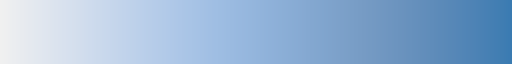

In [ ]:
cmap = cc.cm.blues
cmap

In [ ]:
df_sta['ratio_color'] =df_sta['capacite']/df_sta['capacite'].max()

In [ ]:
df_sta

,fid,id,id_local,code_com,xlong,ylat,capacite,capacite_cargo,mobilier,protection,...,nom_local,commune_local,adresse_local,type,CODE,epci,lon,lat,annee,ratio_color
0,1,1,1,38185.0,5.714076,45.181421,40,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Irvoy,Grenoble,18 Rue Irvoy,stationnementcyclable,0,LaMetro,5.71408,45.18142,2021,0.067114
1,2,3,3,38185.0,5.704258,45.202770,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Presqu'île,Grenoble,84 rue des Martyrs,stationnementcyclable,1,LaMetro,5.70426,45.20277,2021,0.062081
2,3,4,4,38185.0,5.712925,45.192064,42,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park gare Europole,Grenoble,2 Avenue Doyen Louis Weil,stationnementcyclable,2,LaMetro,5.71293,45.19206,2021,0.070470
3,4,5,5,38185.0,5.733307,45.194851,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Notre Dame Musée,Grenoble,50 Avenue Maréchal Randon,stationnementcyclable,3,LaMetro,5.73331,45.19485,2021,0.062081
4,5,6,6,38185.0,5.726688,45.186177,101,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Victor Hugo,Grenoble,Rue François Raoult,stationnementcyclable,4,LaMetro,5.72669,45.18618,2021,0.169463
5,6,7,7,38185.0,5.741103,45.188454,123,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Mistral Mairie,Grenoble,419 Avenue de Valmy,stationnementcyclable,5,LaMetro,5.74110,45.18845,2021,0.206376
6,7,8,8,38185.0,5.738740,45.162000,50,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Géants,Grenoble,10 Place des Géants,stationnementcyclable,6,LaMetro,5.73874,45.16200,2021,0.083893
7,8,9,9,38185.0,5.710744,45.188843,20,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Le Cèdre,Grenoble,Rue Anthoard,stationnementcyclable,7,LaMetro,5.71074,45.18884,2021,0.033557
8,9,10,10,38185.0,5.716797,45.189197,29,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Estacade,Grenoble,22 Rue Colonel Denfert Rochereau,stationnementcyclable,8,LaMetro,5.71680,45.18920,2021,0.048658
13,14,24,24,38185.0,5.734100,45.189395,5,0,RATELIER AVEC ARCEAU,CONSIGNE COLLECTIVE FERMEE,...,VILLARS-HEBERT,Grenoble,3b rue Dominique Villars,stationnementcyclable,13,LaMetro,5.73410,45.18939,2021,0.008389


In [ ]:
for index, row in df_sta.iterrows():
  color = cmap(row['ratio_color'])
  folium.CircleMarker([row['lat'],row['lon']],
                      radius=5,
                      popup=f"capacité :{row['capacite']}",
                      fill=True,
                      fill_color=color).add_to(map_parking)

In [ ]:
map_parking

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.columns

Index(['id', 'geo_point_2d', 'id_local', 'id_osm', 'code_com', 'xlong', 'ylat',
       'capacite', 'capacite_cargo', 'mobilier', 'protection', 'couverture',
       'acces', 'surveillance', 'lumiere', 'url_info', 'd_service', 'source',
       'proprietaire', 'gestionnaire', 'date_maj', 'commentaires', 'nom_local',
       'commune_local', 'adresse_local', 'type', 'code', 'epci', 'lon', 'lat'],
      dtype='object')

## Indicateur : Nombre de kilomètres de pistes cyclables au sein de l'agglomération Grenobloise.

In [ ]:
df = pd.read_csv('pistes_cyclables.xls')
df

,ogc_fid,geo_point_2d,anne_maj,lametro,type,name,geo_shape
0,1489,"45.17402,5.74223",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.74223,4..."
1,1490,"45.17272,5.73701",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73701,4..."
2,1491,"45.17273,5.73488",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73488,4..."
3,1492,"45.17315,5.73476",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73476,4..."
4,1625,"45.20183,5.75957",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.75957,4..."
...,...,...,...,...,...,...,...
1197,2813,"45.15938,5.72401",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72401,4..."
1198,2810,"45.20988,5.83977",2021.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.83977,4..."
1199,1637,"45.19119,5.72127",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72127,4..."
1200,1639,"45.18615,5.72467",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72467,4..."


In [ ]:
# Fonction pour vérifier le type de géométrie
def is_linestring(geo_shape):
    try:
        shape = json.loads(geo_shape)
        return shape['type'] == 'LineString'
    except:
        return False

# Vérifier si toutes les géométries sont des LineString
df['is_linestring'] = df['geo_shape'].apply(is_linestring)

# Résumé des résultats
print("Résumé des types de géométries :")
print(df['is_linestring'].value_counts())

# Identifier les géométries non conformes, s'il y en a
non_linestring_rows = df[~df['is_linestring']]
if not non_linestring_rows.empty:
    print("Lignes avec des géométries non conformes :")
    print(non_linestring_rows)
else:
    print("Toutes les géométries sont des LineString.")

Résumé des types de géométries :
is_linestring
True    1202
Name: count, dtype: int64
Toutes les géométries sont des LineString.


### Calcul des distances de la piste cyclable

In [ ]:
def test(file):
  df=pd.read_csv(file)
  shape = json.loads(element for element in df['geo_shape'])
  if shape['type']=='LineString':
    coordinates = shape['coordinates']
    df['distance'] = [geodesic(coordinates[i],coordinates[i+1]).kilometers for i in range(len(coordinates)-1)]
    return df

  else:
    return 'Le fichier ne comprend pas de données au format gps de type LineString'

In [ ]:
test('pistes_cyclables.xls')

TypeError: the JSON object must be str, bytes or bytearray, not generator

In [ ]:
from shapely import length
from shapely.geometry import shape
def calculate_total_distance(file):
  try:
      df = pd.read_csv(file)
      df['geometry'] = df['geo_shape'].apply(shape)  # Convertir en objets Shapely

      # Filtrer uniquement les lignes avec des géométries de type LineString
      lines = df[df['geometry'].geom_type == 'LineString']

      if lines.empty:
          return 'Le fichier ne contient pas de lignes'

      # Calculer la distance totale
      total_distance = lines['geometry'].apply(length).sum()
      return total_distance
  except FileNotFoundError:
        return 'Fichier introuvable'
  except KeyError:
      return "La colonne 'geo_shape' est manquante"
  except Exception as e:
      return f"Une erreur s'est produite: {e}"

In [ ]:
calculate_total_distance('pistes_cyclables.xls')

"Une erreur s'est produite: 'str' object has no attribute 'get'"

In [ ]:
# Fonction pour calculer la distance d'une piste cyclable à partir de la colonne geo_shape
def calculate_distance(geo_shape):
    try:
        # Charger les coordonnées GeoJSON
        shape = json.loads(geo_shape)
        if shape['type'] == 'LineString':
            coordinates = shape['coordinates']
            # Calculer la distance totale entre les points consécutifs
            distances = [
                geodesic(coordinates[i], coordinates[i+1]).kilometers
                for i in range(len(coordinates) - 1)
            ]
            return sum(distances)
    except:
        return None  # Retourner None si un problème survient

# Ajouter une colonne pour les distances
df['distance_km'] = df['geo_shape'].apply(calculate_distance)

# Enregistrer le DataFrame avec la nouvelle colonne dans un nouveau fichier CSV
df.to_csv('fichier_avec_distances.csv', index=False)

# Afficher les premières lignes pour vérifier
print(df.head())

   ogc_fid      geo_point_2d  anne_maj  lametro        type name  \
0     1489  45.17402,5.74223    2016.0        1  chronovelo  NaN   
1     1490  45.17272,5.73701    2016.0        1  chronovelo  NaN   
2     1491  45.17273,5.73488    2016.0        1  chronovelo  NaN   
3     1492  45.17315,5.73476    2016.0        1  chronovelo  NaN   
4     1625  45.20183,5.75957    2016.0        1  chronovelo  NaN   

                                           geo_shape  is_linestring  \
0  {"type":"LineString","coordinates":[[5.74223,4...           True   
1  {"type":"LineString","coordinates":[[5.73701,4...           True   
2  {"type":"LineString","coordinates":[[5.73488,4...           True   
3  {"type":"LineString","coordinates":[[5.73476,4...           True   
4  {"type":"LineString","coordinates":[[5.75957,4...           True   

   distance_km  
0     0.231531  
1     0.235551  
2     0.055292  
3     0.106301  
4     0.234373  


In [ ]:
df.distance_km.sum()

619.2463236890862

## Streamlit

voir fichier streamlit_script.py

In [ ]:
def fct_map_reseau_cyclable(file):
  df_piste = pd.read_csv(file)
  # Création des colonnes 'latitude' et 'longitude'
  df_piste['lat'] = [element[1] for element in df_piste['geo_point_2d'].str.split(',')]
  df_piste['long'] = [element[0] for element in df_piste['geo_point_2d'].str.split(',')]
  df_piste['lat'] = df_piste['lat'].astype(object)
  df_piste['long'] = df_piste['long'].astype(object)
  df_piste['geo_shape'] = df_piste['geo_shape'].apply(lambda x: LineString(eval(x)['coordinates']))
  df_piste['coordonnees'] = df_piste['geo_shape'].apply(lambda x: list(x.coords)).to_list()

  df_piste['coordonnees'] = df_piste['coordonnees'].apply(lambda x: reverse_coordonnees(x))

  # Création de la map
  map_piste_cyclable = folium.Map(location=[45.188529, 5.724524],zoom_start=14,titles='Map Piste Cyclable')
  for cords in df_piste['coordonnees']:
    folium.PolyLine(cords, color='red').add_to(map_piste_cyclable)

  return map_piste_cyclable

In [ ]:
st_folium(fct_map_reseau_cyclable('BaseDeDonnées/Grenoble/pistes_cyclables.xls'))